# Housing Price Prediction Project

In [1]:
# Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [6]:
train.shape

(1168, 81)

Total number of Rows = 1168 and Columns = 81

In [8]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [9]:
test.shape

(292, 80)

Total number of Rows = 292 and Columns = 80

In [10]:
# Let's get the information regarding the Train First

In [11]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

So many Columns

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [14]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

From the above case, the given dataset contains Null Values

# Describing the dataset ---

In [15]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Visualizing all the missing values

<AxesSubplot:>

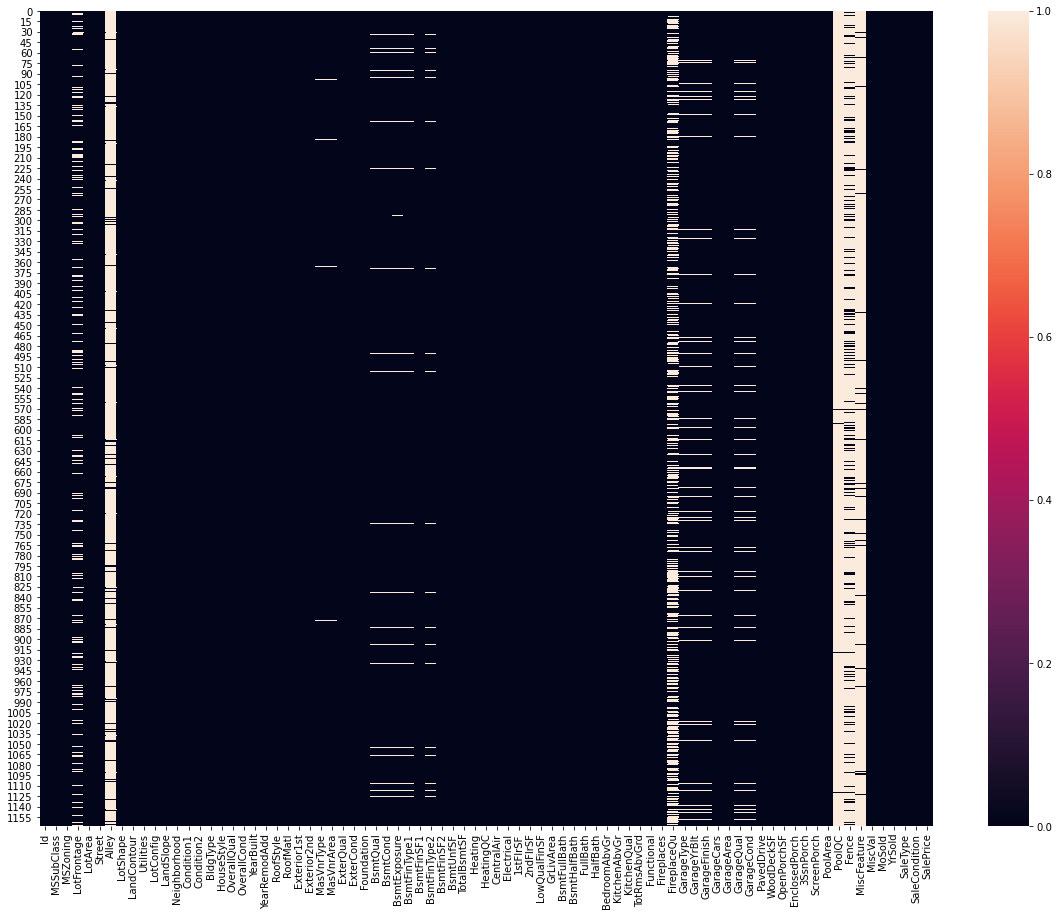

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(train.isnull())

Let's further find the percentage of the NaN values that are present in the given dataset

In [17]:
features_with_na = [features for features in train.columns if train[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values \n')

LotFrontage 0.1832  % missing values 

Alley 0.9341  % missing values 

MasVnrType 0.006  % missing values 

MasVnrArea 0.006  % missing values 

BsmtQual 0.0257  % missing values 

BsmtCond 0.0257  % missing values 

BsmtExposure 0.0265  % missing values 

BsmtFinType1 0.0257  % missing values 

BsmtFinType2 0.0265  % missing values 

FireplaceQu 0.4717  % missing values 

GarageType 0.0548  % missing values 

GarageYrBlt 0.0548  % missing values 

GarageFinish 0.0548  % missing values 

GarageQual 0.0548  % missing values 

GarageCond 0.0548  % missing values 

PoolQC 0.994  % missing values 

Fence 0.7971  % missing values 

MiscFeature 0.9623  % missing values 



# EDA

# Scatterplot ---

In [21]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

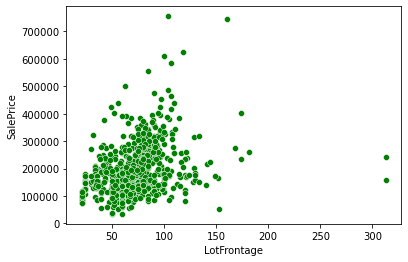

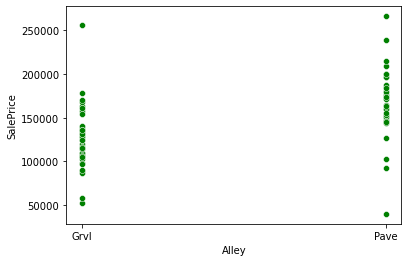

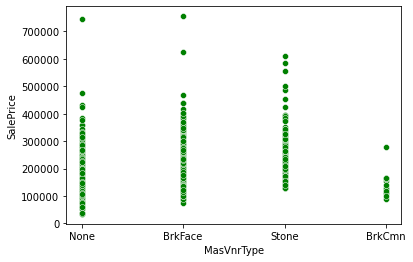

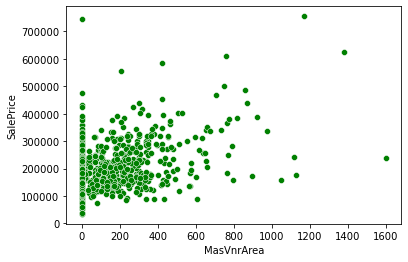

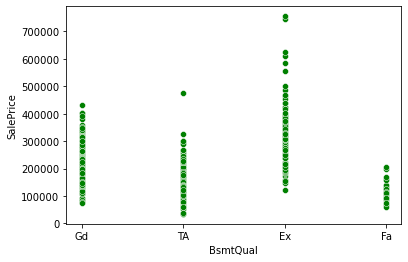

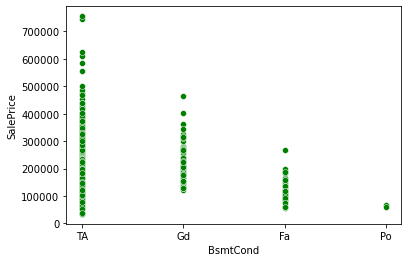

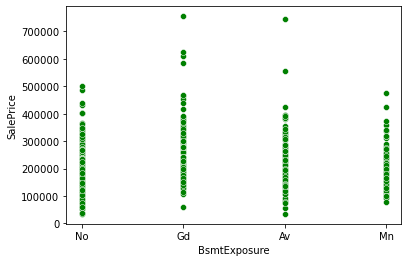

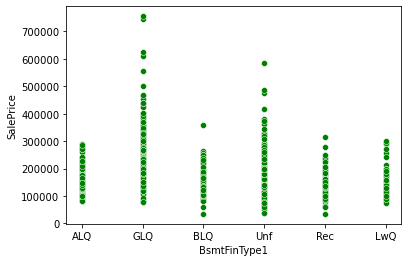

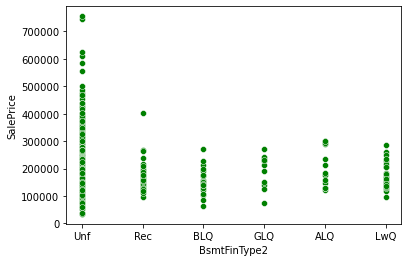

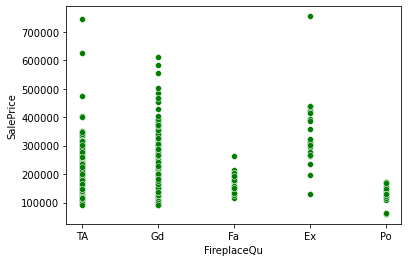

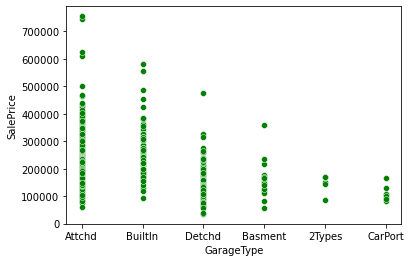

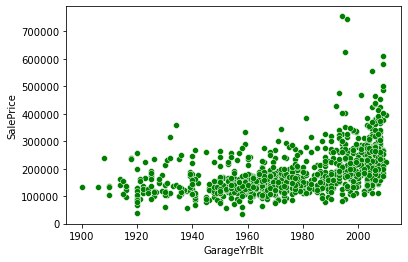

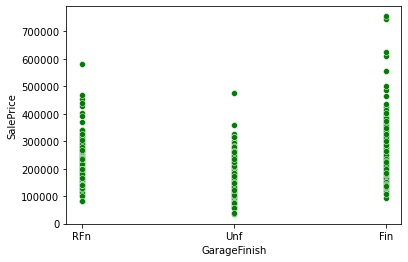

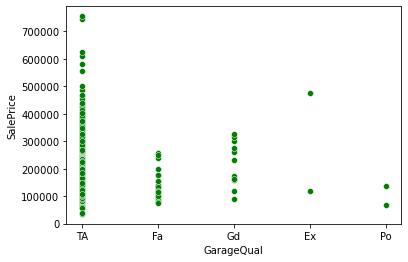

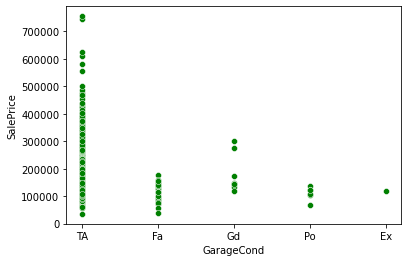

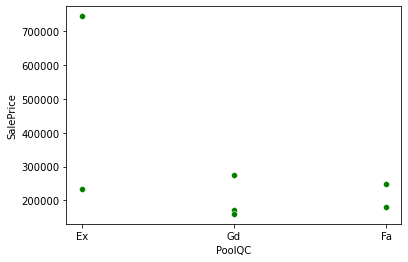

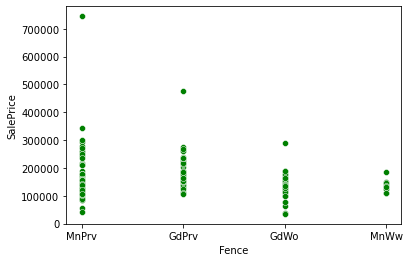

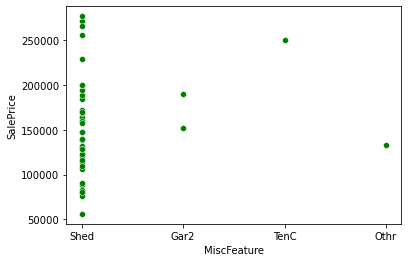

In [22]:
for i in features_with_na:
    sns.scatterplot(x=train[i], y=train["SalePrice"], color='green')
    plt.show()

Dropping the unnecessary data from the given dataset

In [23]:
train.drop(['Id'],inplace=True,axis=1)

In [25]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('\n')

train[numerical_features]

Number of numerical variables:  37




MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120          NaN     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20          NaN    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20          NaN     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60          NaN     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             1976         0.0         120           0  ...           0   
1             1970         0.0         351         823  ...          81   
2             1997         0.0         862           0  ...         180   
3             1977       480.0         705           0  ...           0   
4             2000       126.0        1246           0  ...         240   
...            ...         ...         ...         ...  ...         ...   
1163          1967        31.0         450           0  ...           0   
1164          2003         0.0           0           0  ...           0   
1165          1976         0.0         566           0  ...          87   
1166          1950         0.0           0           0  ...           0   
1167          2003         0.0         457           0  ...         100   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0             205              0          0            0         0        0   
1             207              0          0          224         0        0   
2             130              0          0            0         0        0   
3             122              0          0            0         0        0   
4               0              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1163            0              0          0            0         0        0   
1164           96              0          0            0         0        0   
1165            0              0          0            0         0        0   
1166           54            172          0            0         0        0   
1167           75              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2007     128000  
1         10    2007     268000  
2          6    2007     269790  
3          1    2010     190000  
4          6    2009     215000  
...      ...     ...        ...  
1163       2    2010     122000  
1164       5    2009     108000  
1165       7    2009     148500  
1166       7    2008      40000  
1167       6    2006     183200  

[1168 rows x 37 columns]

In [27]:
train[numerical_features].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120          NaN     4928            6            5       1976   
1          20         95.0    15865            8            6       1970   
2          60         92.0     9920            7            5       1996   
3          20        105.0    11751            6            6       1977   
4          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1976         0.0         120           0  ...           0   
1          1970         0.0         351         823  ...          81   
2          1997         0.0         862           0  ...         180   
3          1977       480.0         705           0  ...           0   
4          2000       126.0        1246           0  ...         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   
2          130              0          0            0         0        0   
3          122              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  
2       6    2007     269790  
3       1    2010     190000  
4       6    2009     215000  

[5 rows x 37 columns]

In [28]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print("Variables which include year is :-", year_feature)

Variables which include year is :- ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Now we will observe all the information that is present in these year variables

In [30]:
for feature in year_feature:
    print(feature, train[feature].unique())
    print('\n')

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]


YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]


GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987.

Let's observe the difference between the House Price Vs Year Sold 

<Figure size 2160x1440 with 0 Axes>

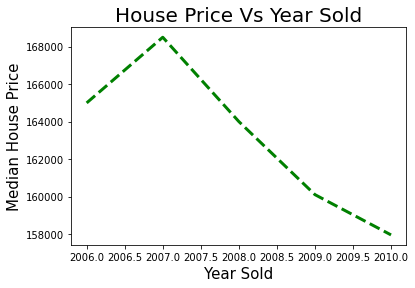

<Figure size 2160x1440 with 0 Axes>

In [31]:
train.groupby('YrSold')['SalePrice'].median().plot(color = "green",linestyle = "--",linewidth=3)
plt.xlabel('Year Sold',fontsize = 15)
plt.ylabel('Median House Price',fontsize =15)
plt.title("House Price Vs Year Sold",fontsize=20)
plt.figure(figsize=(30,20))

Let's compare the difference between All Years feature with the Sale Price

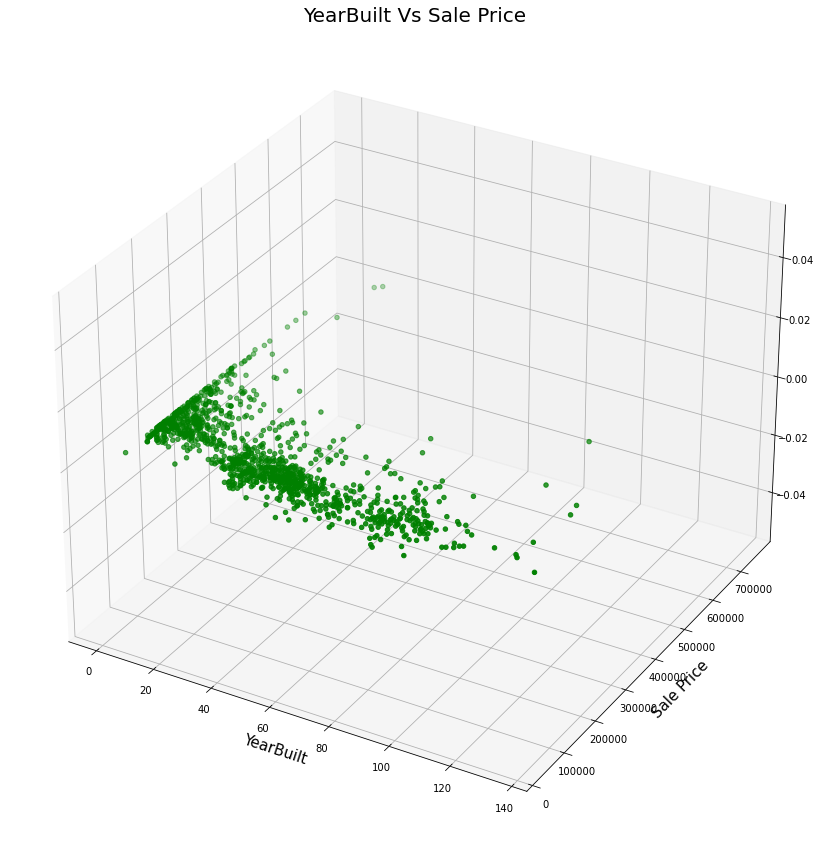

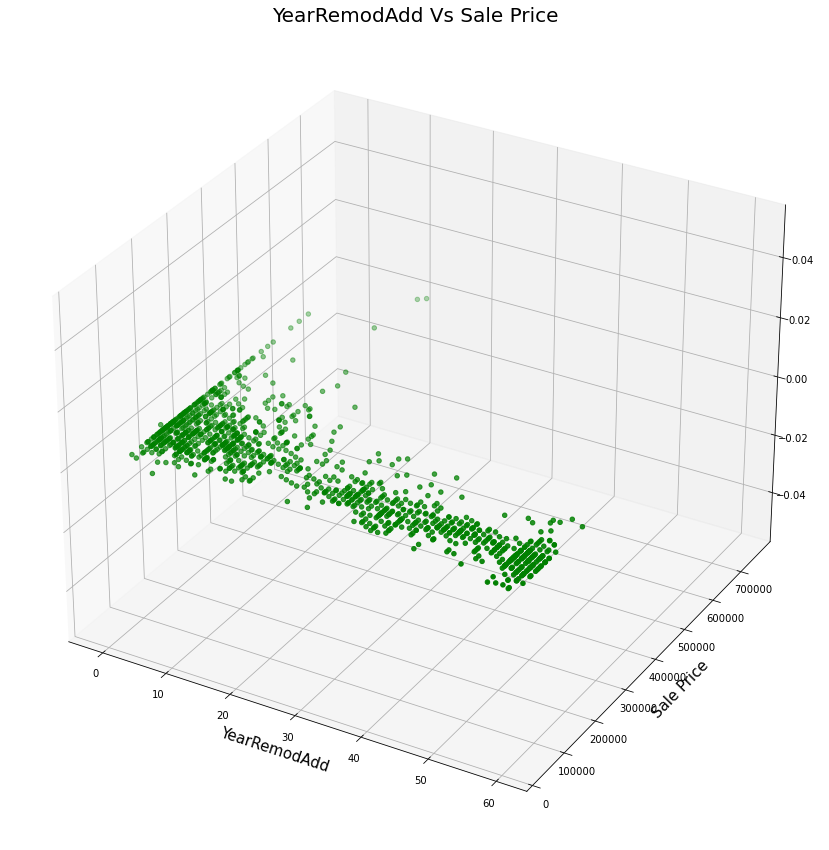

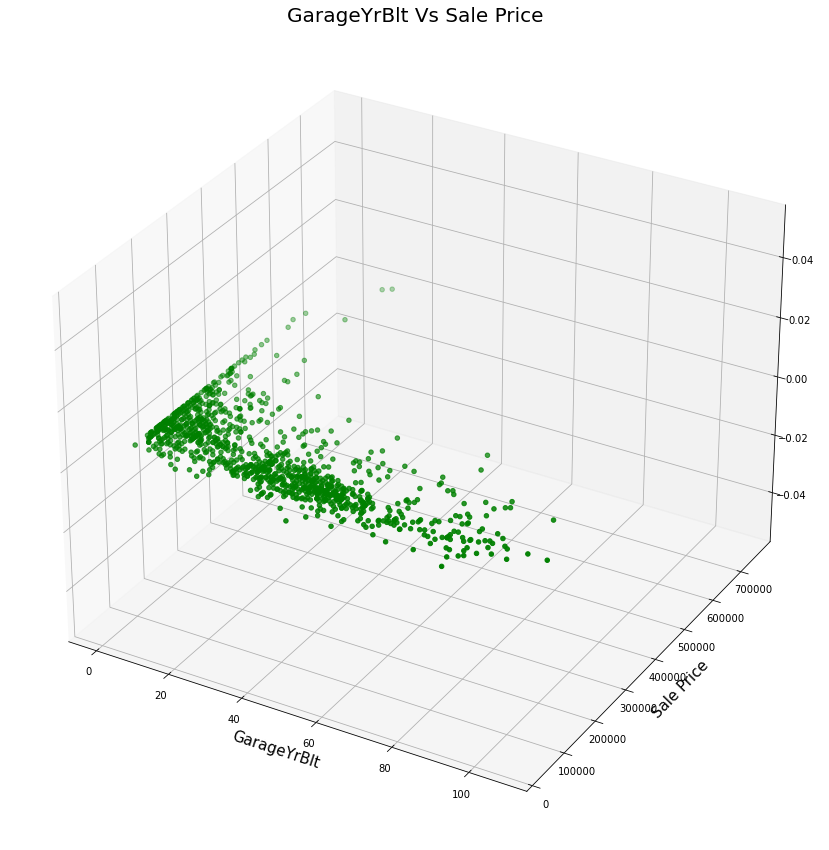

In [34]:
for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        data[feature]=data['YrSold']-data[feature]
        fig = plt.figure(figsize = (30, 15))
        ax = plt.axes(projection ="3d")
        ax.scatter3D(data[feature],data['SalePrice'], color="green")
        plt.title(feature  +  " Vs Sale Price",fontsize = 20)
        plt.xlabel(feature,fontsize = 15)
        plt.ylabel('Sale Price',fontsize = 15)
        plt.grid(color="palegreen")
        plt.show()

In [35]:
discrete_feature = [feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [36]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [37]:
train[discrete_feature]

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0            120            6            5             0             0   
1             20            8            6             0             1   
2             60            7            5             0             1   
3             20            6            6             0             0   
4             20            6            7             0             0   
...          ...          ...          ...           ...           ...   
1163          20            5            5             0             0   
1164          20            4            5             0             0   
1165         160            6            6             0             0   
1166          70            4            4             0             0   
1167          60            6            5             0             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  \
0                5           1           2          0         0        0   
1                8           1           2          0         0        0   
2                8           1           2          0         0        0   
3                7           1           2          0         0        0   
4                8           1           2          0         0        0   
...            ...         ...         ...        ...       ...      ...   
1163             5           0           1          0         0        0   
1164             5           0           2          0         0        0   
1165             7           1           2          0         0        0   
1166             6           0           1          0         0        0   
1167             7           1           2          0         0        0   

      MoSold  YrSold  
0          2    2007  
1         10    2007  
2          6    2007  
3          1    2010  
4          6    2009  
...      ...     ...  
1163       2    2010  
1164       5    2009  
1165       7    2009  
1166       7    2008  
1167       6    2006  

[1168 rows x 18 columns]

In [38]:
train[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  YrSold  
0           1           2          0         0        0       2    2007  
1           1           2          0         0        0      10    2007  
2           1           2          0         0        0       6    2007  
3           1           2          0         0        0       1    2010  
4           1           2          0         0        0       6    2009

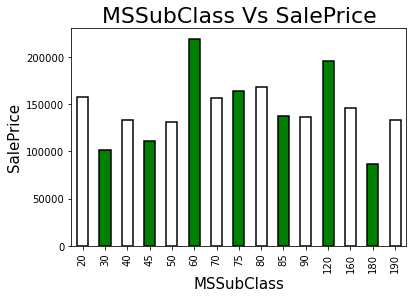

<Figure size 2880x1440 with 0 Axes>

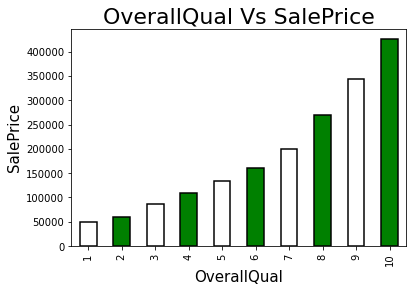

<Figure size 2880x1440 with 0 Axes>

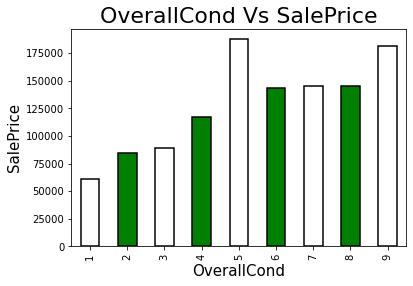

<Figure size 2880x1440 with 0 Axes>

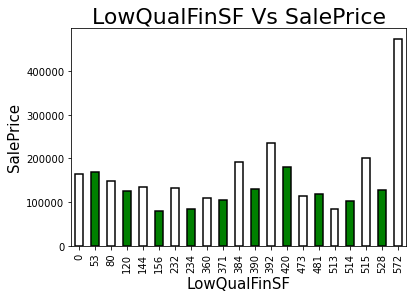

<Figure size 2880x1440 with 0 Axes>

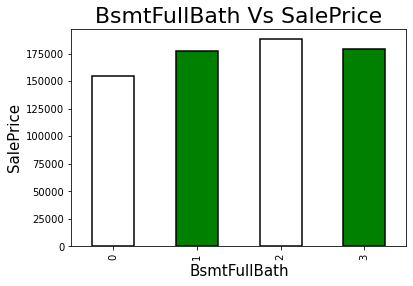

<Figure size 2880x1440 with 0 Axes>

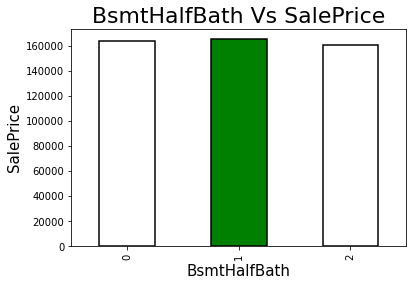

<Figure size 2880x1440 with 0 Axes>

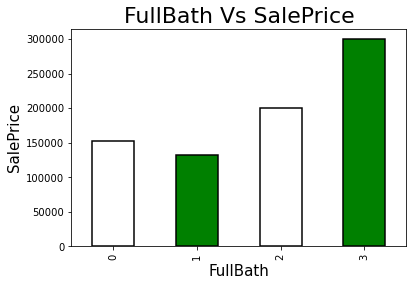

<Figure size 2880x1440 with 0 Axes>

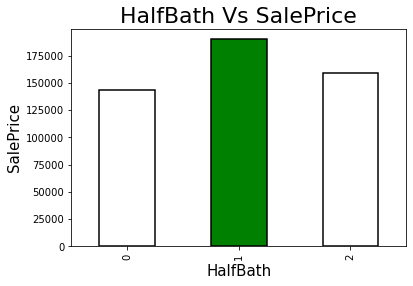

<Figure size 2880x1440 with 0 Axes>

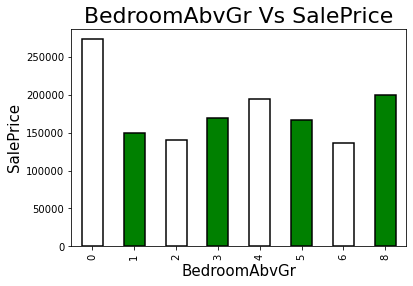

<Figure size 2880x1440 with 0 Axes>

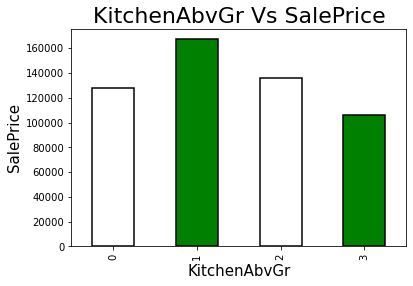

<Figure size 2880x1440 with 0 Axes>

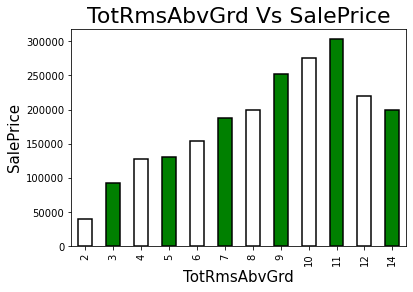

<Figure size 2880x1440 with 0 Axes>

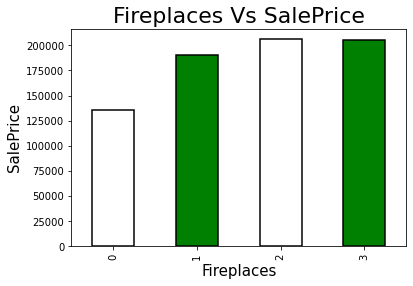

<Figure size 2880x1440 with 0 Axes>

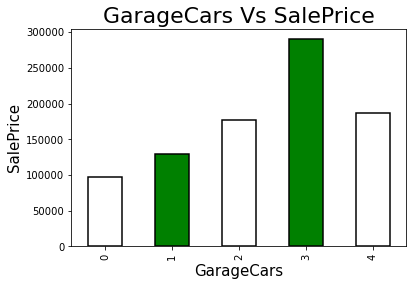

<Figure size 2880x1440 with 0 Axes>

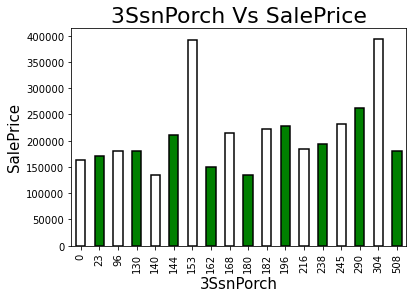

<Figure size 2880x1440 with 0 Axes>

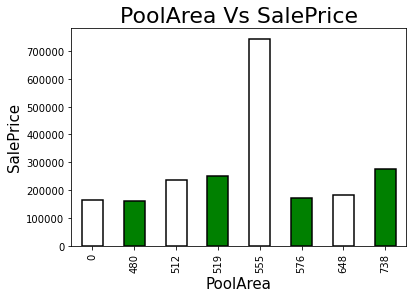

<Figure size 2880x1440 with 0 Axes>

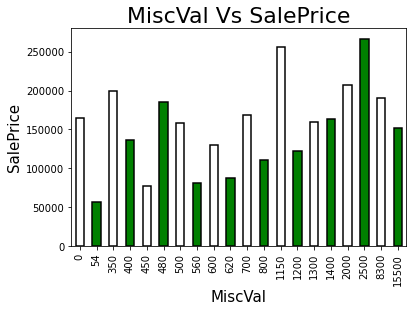

<Figure size 2880x1440 with 0 Axes>

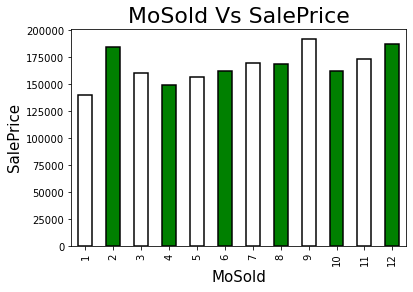

<Figure size 2880x1440 with 0 Axes>

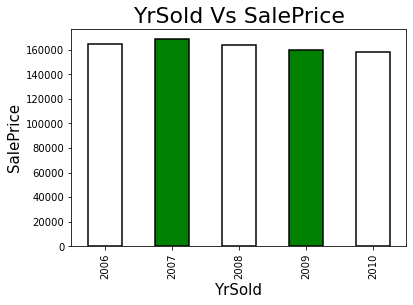

<Figure size 2880x1440 with 0 Axes>

In [41]:
for feature in discrete_feature:
    data = train.copy()
    colors = ["white","green"]
    data.groupby(feature)['SalePrice'].median().plot.bar(color=colors,edgecolor = "black", linewidth=1.5)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('SalePrice',fontsize =15)
    plt.title(feature +" Vs SalePrice",fontsize = 22)
    plt.figure(figsize = (40, 20))
    plt.show()

In [42]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous Feature Count {}".format(len(continuous_feature)))

Continuous Feature Count 16


Let us examine values by creating Histograms

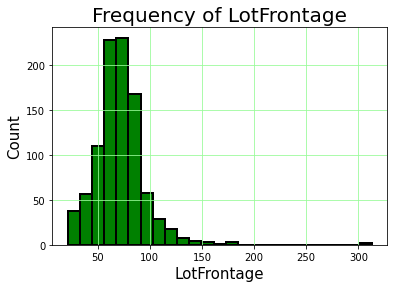

<Figure size 2160x1080 with 0 Axes>

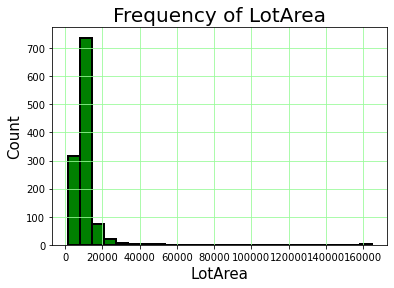

<Figure size 2160x1080 with 0 Axes>

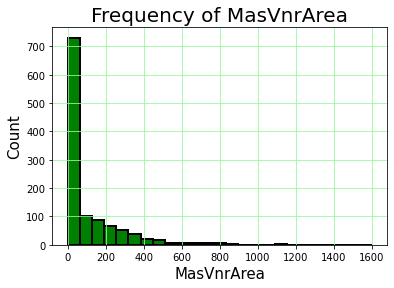

<Figure size 2160x1080 with 0 Axes>

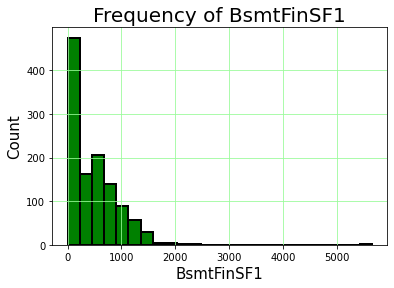

<Figure size 2160x1080 with 0 Axes>

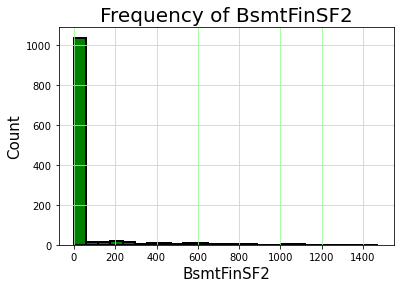

<Figure size 2160x1080 with 0 Axes>

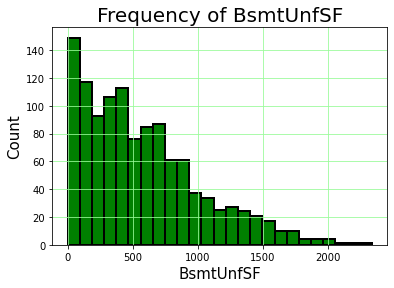

<Figure size 2160x1080 with 0 Axes>

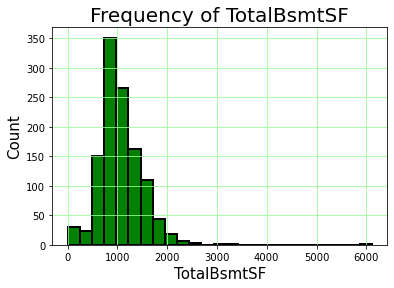

<Figure size 2160x1080 with 0 Axes>

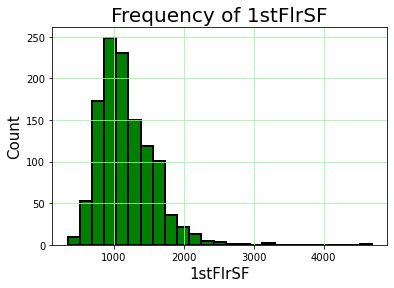

<Figure size 2160x1080 with 0 Axes>

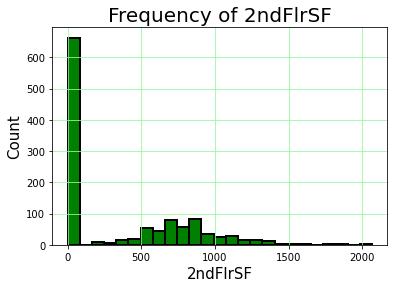

<Figure size 2160x1080 with 0 Axes>

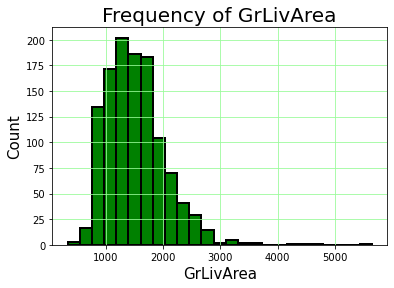

<Figure size 2160x1080 with 0 Axes>

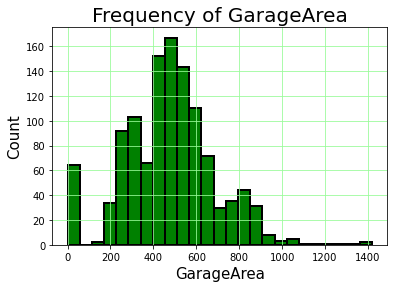

<Figure size 2160x1080 with 0 Axes>

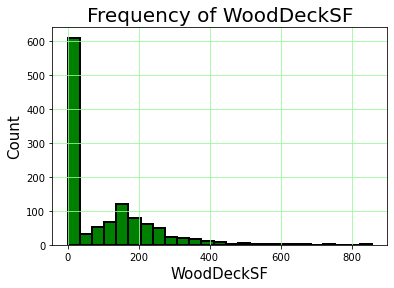

<Figure size 2160x1080 with 0 Axes>

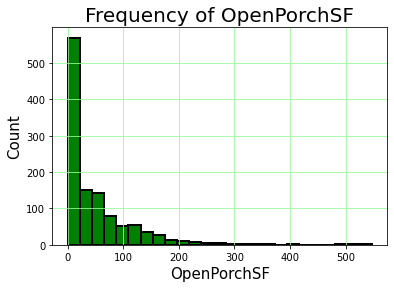

<Figure size 2160x1080 with 0 Axes>

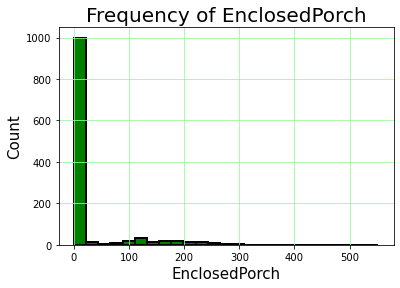

<Figure size 2160x1080 with 0 Axes>

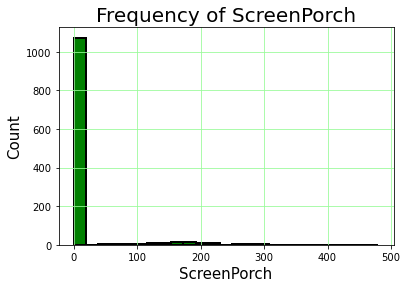

<Figure size 2160x1080 with 0 Axes>

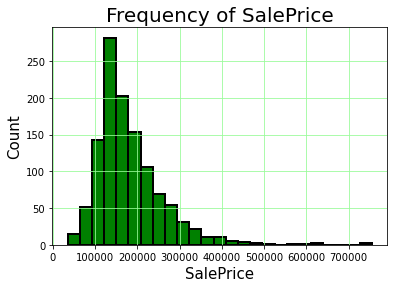

<Figure size 2160x1080 with 0 Axes>

In [43]:
for feature in continuous_feature:
    data = train.copy()
    data[feature].hist(bins=25, color = "green", edgecolor = "black", linewidth = 2)
    plt.xlabel(feature + "",fontsize=15)
    plt.ylabel("Count",fontsize=15)
    plt.title("Frequency of " + feature,fontsize = 20) 
    plt.grid(color = "palegreen")
    plt.figure(figsize = (30, 15))
    plt.show()

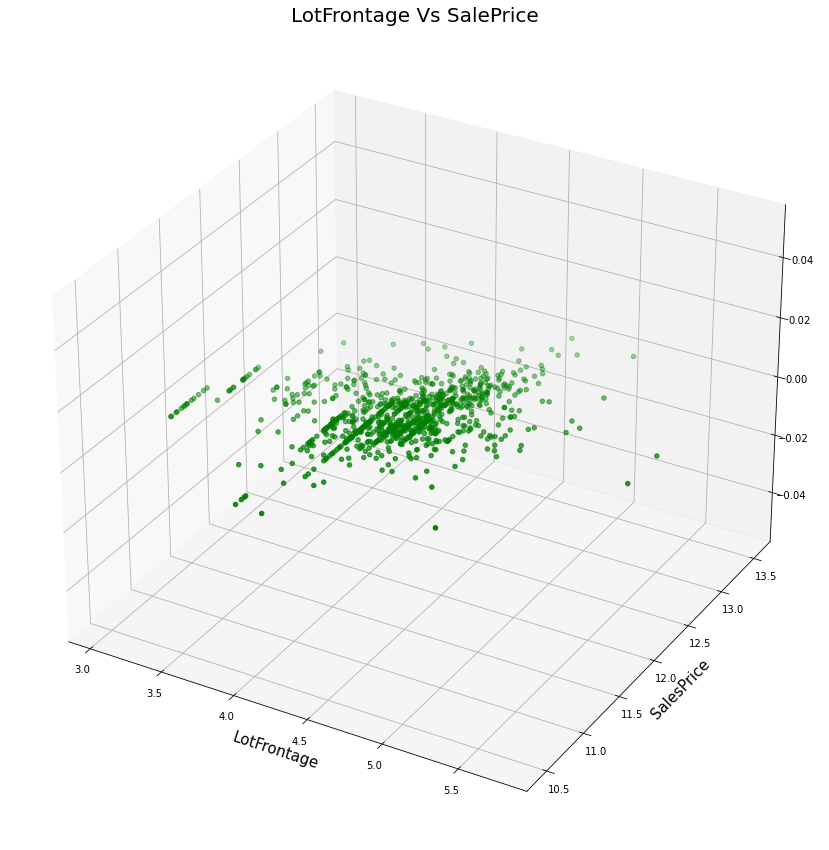

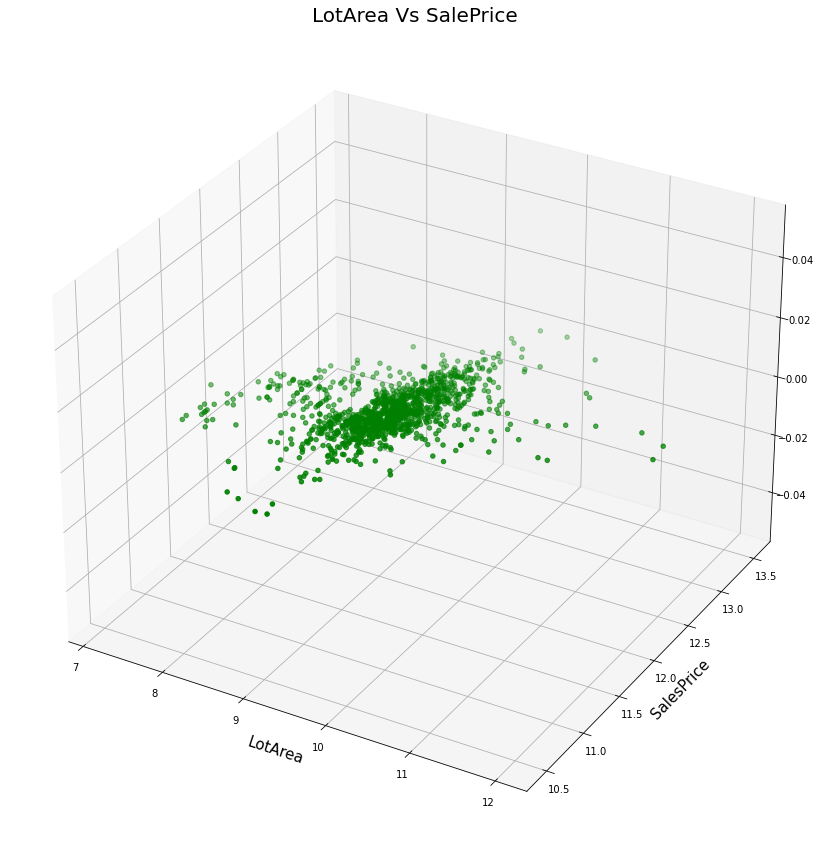

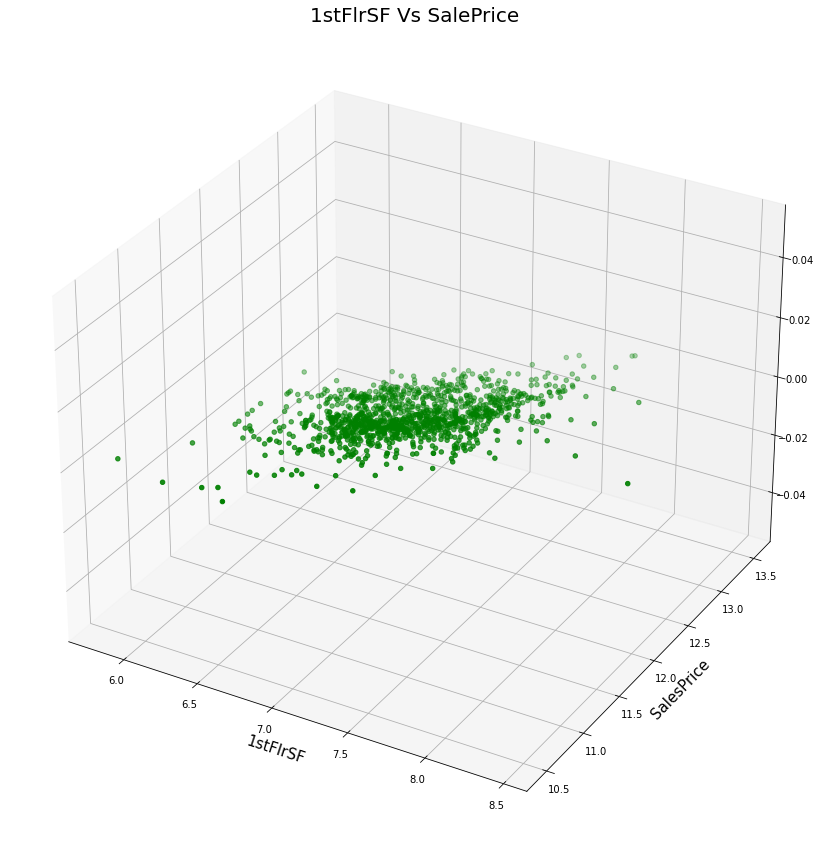

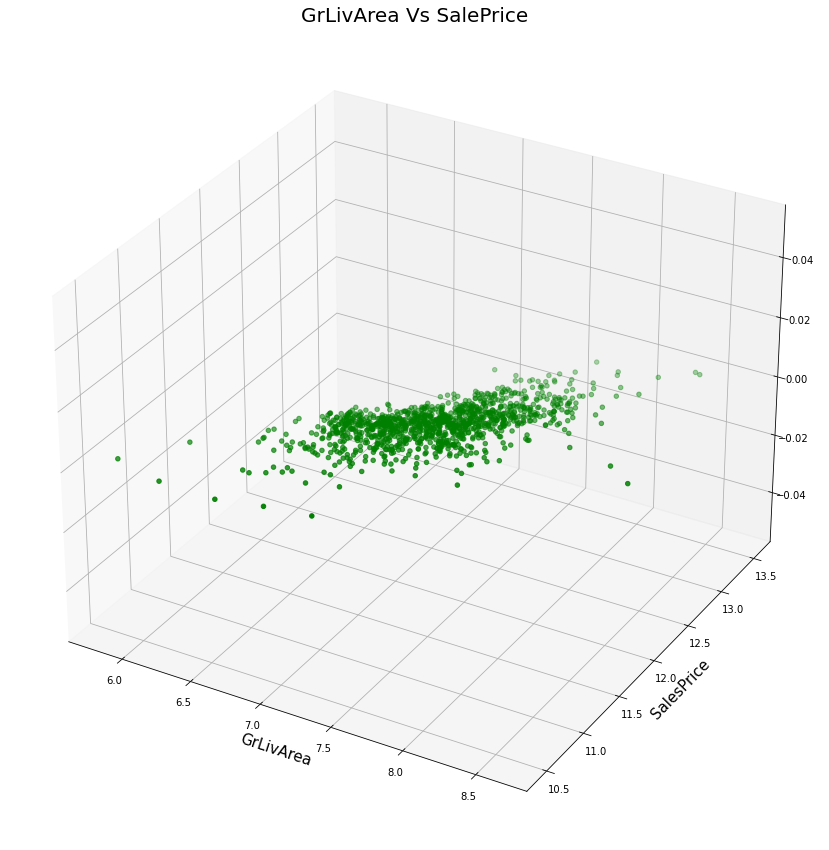

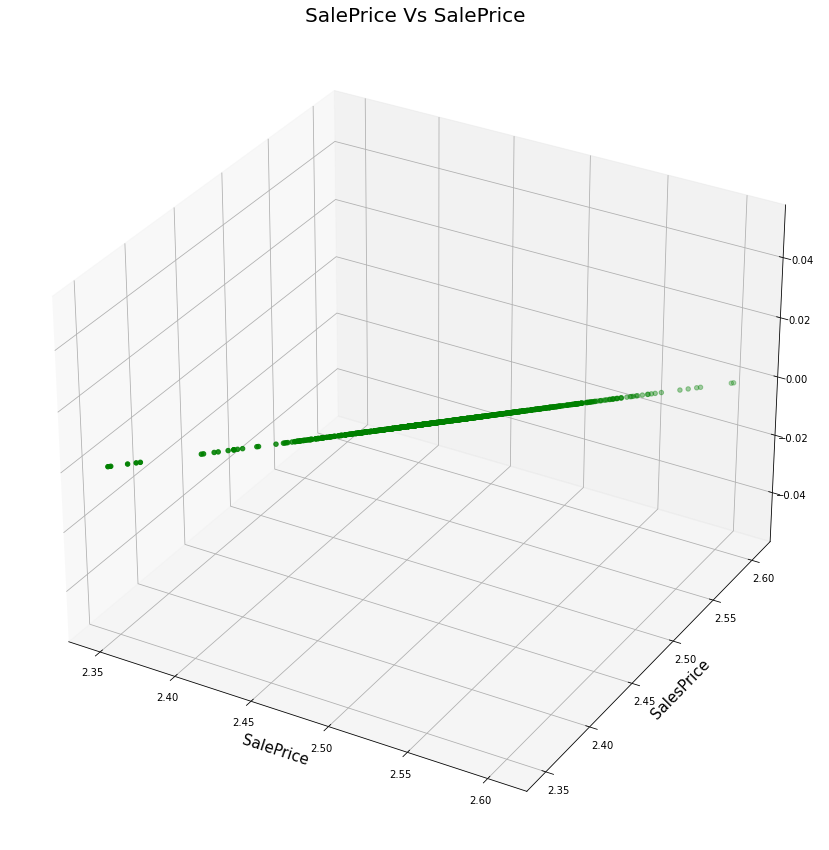

In [46]:
for feature in continuous_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        fig = plt.figure(figsize = (25, 15))
        ax = plt.axes(projection ="3d")
        ax.scatter3D(data[feature],data['SalePrice'],color = "green")
        plt.xlabel(feature,fontsize=15)
        plt.ylabel('SalesPrice',fontsize = 15)
        plt.title(feature + " Vs SalePrice",fontsize=20)
        plt.grid(color = "palegreen")
        plt.show()

# Outlier Checking ---

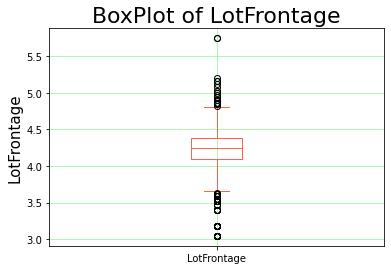

<Figure size 2160x864 with 0 Axes>

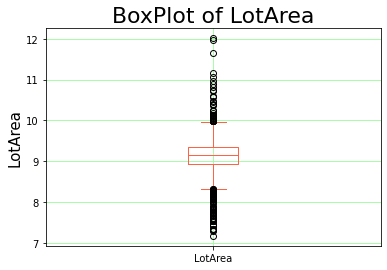

<Figure size 2160x864 with 0 Axes>

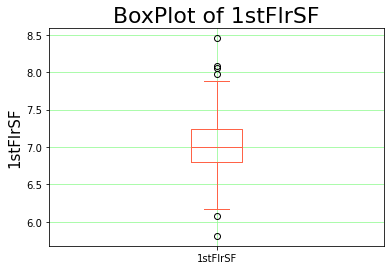

<Figure size 2160x864 with 0 Axes>

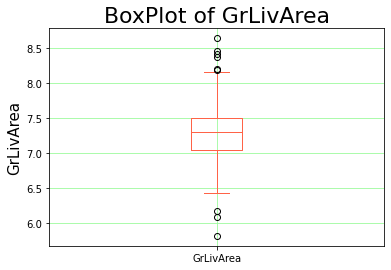

<Figure size 2160x864 with 0 Axes>

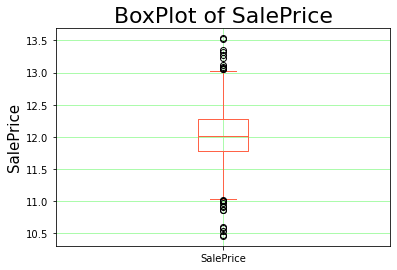

<Figure size 2160x864 with 0 Axes>

In [26]:
#checking outliers
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature,color = 'tomato')
        plt.ylabel(feature,fontsize = 15)
        plt.title("BoxPlot of " + feature,fontsize = 22)
        plt.grid(color = "palegreen")
        plt.figure(figsize=(30,12))
        plt.show()

In [27]:
categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
train[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      NPkVill       Norm  ...     Attchd          RFn         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      NoRidge       Norm  ...     Attchd          Unf         TA         TA   
3       NWAmes       Norm  ...     Attchd          RFn         TA         TA   
4       NWAmes       Norm  ...     Attchd          Fin         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN    NaN         NaN       WD        Normal  
1          Y    NaN    NaN         NaN       WD        Normal  
2          Y    NaN    NaN         NaN       WD        Normal  
3          Y    NaN  MnPrv         NaN      COD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [29]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}.'.format(feature,len(train[feature].unique())))
    print('\n')

The feature is MSZoning and number of categories are 5.


The feature is Street and number of categories are 2.


The feature is Alley and number of categories are 3.


The feature is LotShape and number of categories are 4.


The feature is LandContour and number of categories are 4.


The feature is Utilities and number of categories are 1.


The feature is LotConfig and number of categories are 5.


The feature is LandSlope and number of categories are 3.


The feature is Neighborhood and number of categories are 25.


The feature is Condition1 and number of categories are 9.


The feature is Condition2 and number of categories are 8.


The feature is BldgType and number of categories are 5.


The feature is HouseStyle and number of categories are 8.


The feature is RoofStyle and number of categories are 6.


The feature is RoofMatl and number of categories are 8.


The feature is Exterior1st and number of categories are 14.


The feature is Exterior2nd and number of categories are

Find out the relationship between categorical variable and dependent feature SalesPrice:-

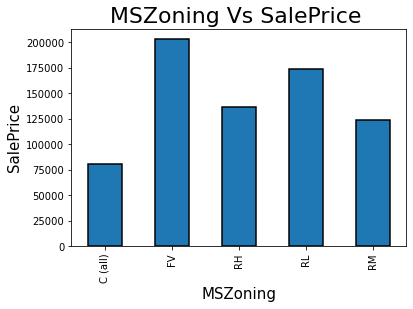

<Figure size 2160x864 with 0 Axes>

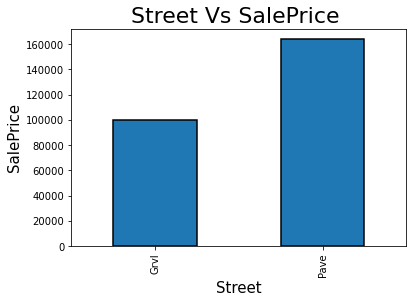

<Figure size 2160x864 with 0 Axes>

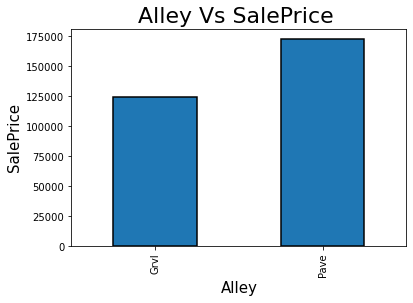

<Figure size 2160x864 with 0 Axes>

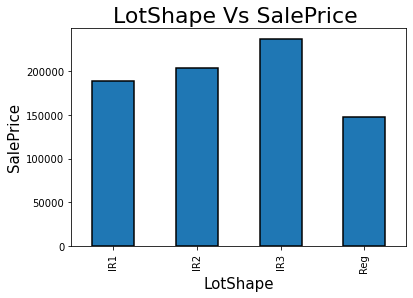

<Figure size 2160x864 with 0 Axes>

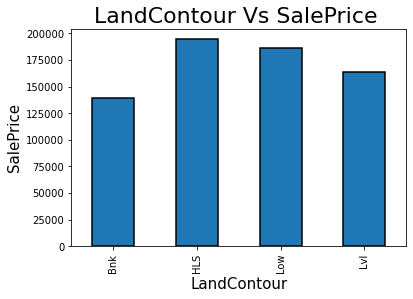

<Figure size 2160x864 with 0 Axes>

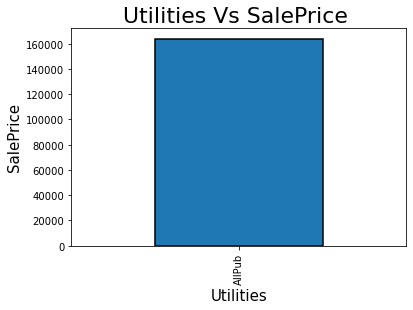

<Figure size 2160x864 with 0 Axes>

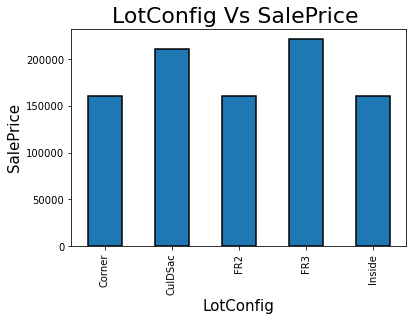

<Figure size 2160x864 with 0 Axes>

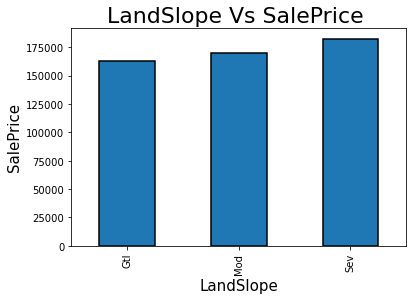

<Figure size 2160x864 with 0 Axes>

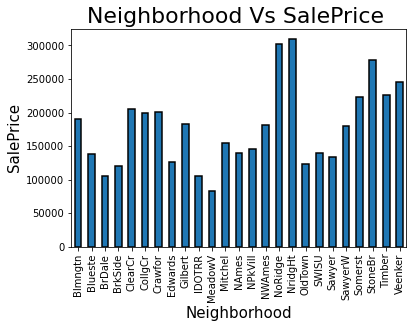

<Figure size 2160x864 with 0 Axes>

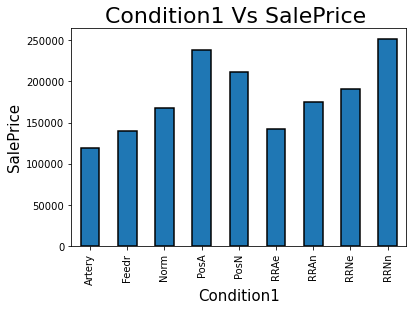

<Figure size 2160x864 with 0 Axes>

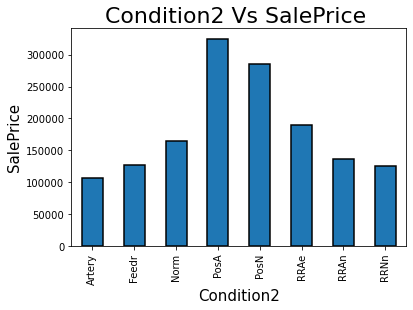

<Figure size 2160x864 with 0 Axes>

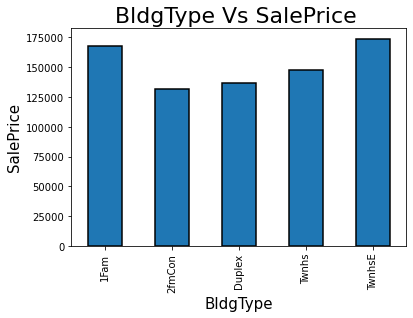

<Figure size 2160x864 with 0 Axes>

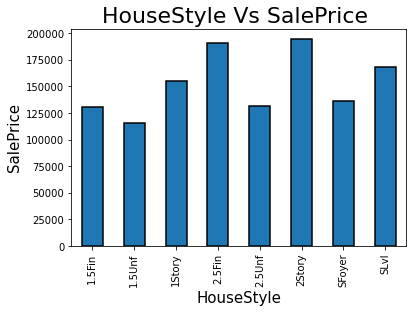

<Figure size 2160x864 with 0 Axes>

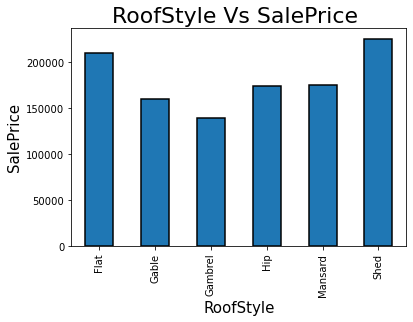

<Figure size 2160x864 with 0 Axes>

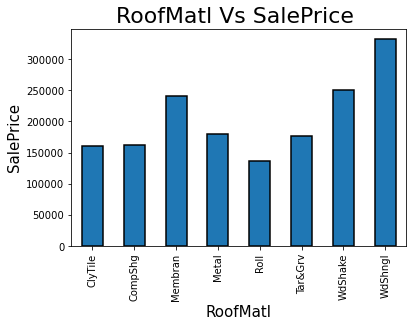

<Figure size 2160x864 with 0 Axes>

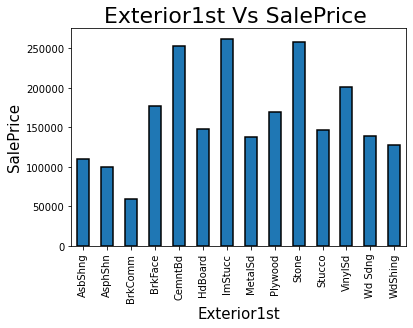

<Figure size 2160x864 with 0 Axes>

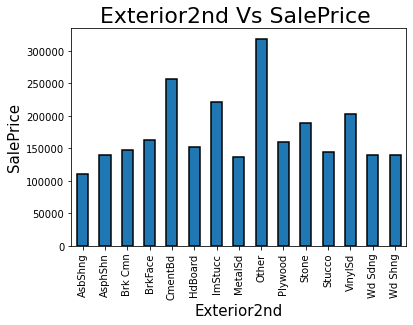

<Figure size 2160x864 with 0 Axes>

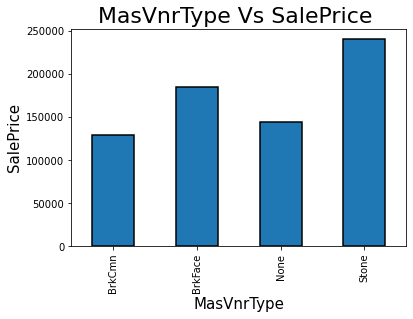

<Figure size 2160x864 with 0 Axes>

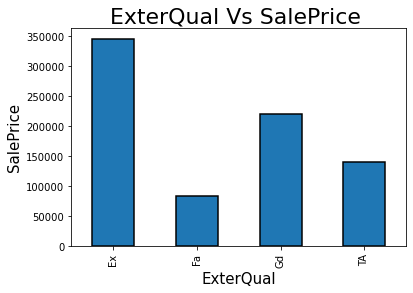

<Figure size 2160x864 with 0 Axes>

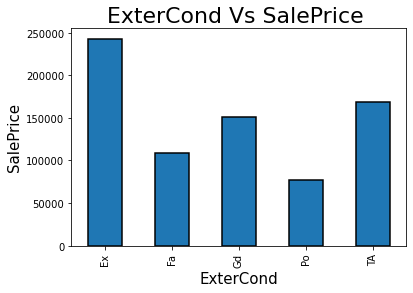

<Figure size 2160x864 with 0 Axes>

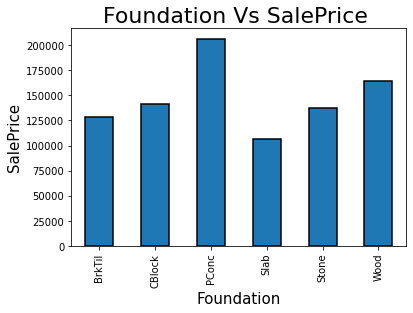

<Figure size 2160x864 with 0 Axes>

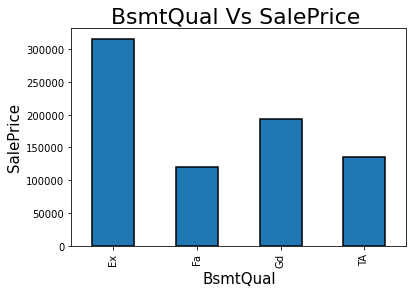

<Figure size 2160x864 with 0 Axes>

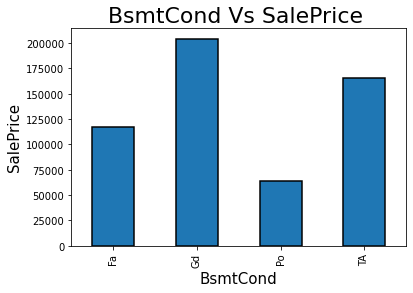

<Figure size 2160x864 with 0 Axes>

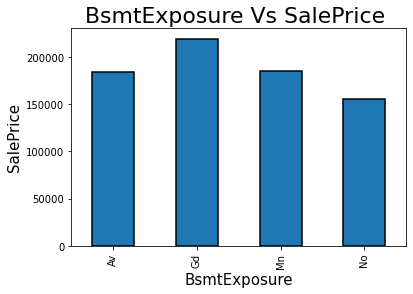

<Figure size 2160x864 with 0 Axes>

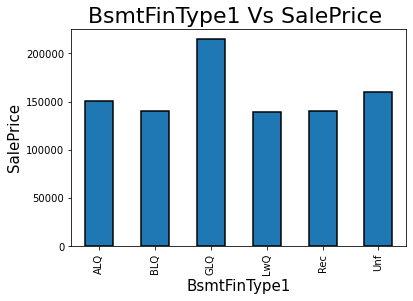

<Figure size 2160x864 with 0 Axes>

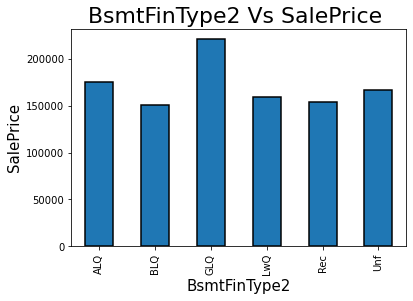

<Figure size 2160x864 with 0 Axes>

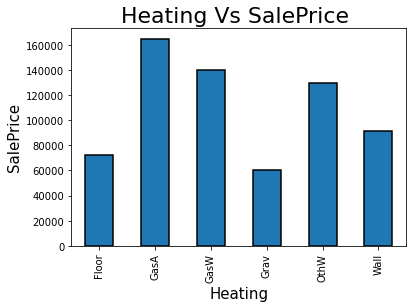

<Figure size 2160x864 with 0 Axes>

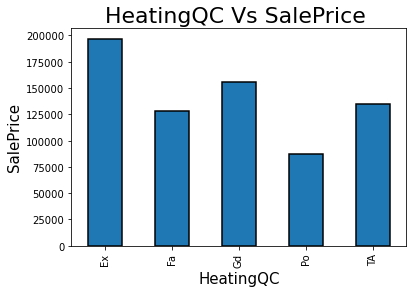

<Figure size 2160x864 with 0 Axes>

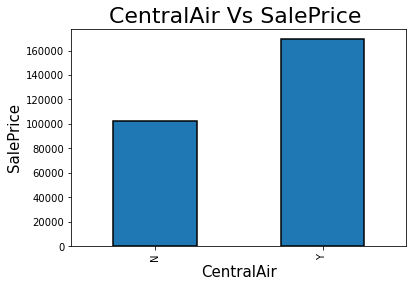

<Figure size 2160x864 with 0 Axes>

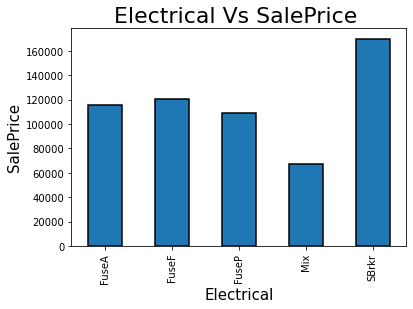

<Figure size 2160x864 with 0 Axes>

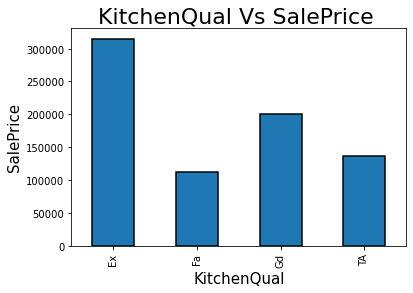

<Figure size 2160x864 with 0 Axes>

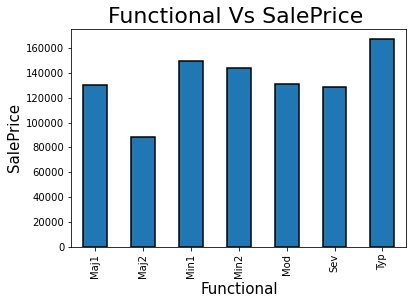

<Figure size 2160x864 with 0 Axes>

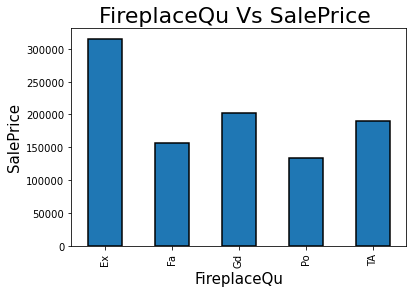

<Figure size 2160x864 with 0 Axes>

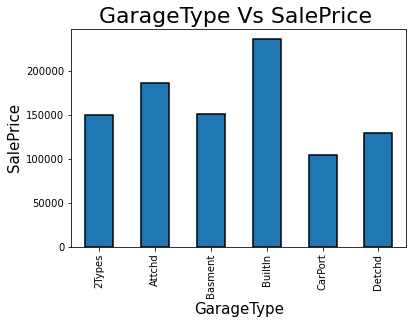

<Figure size 2160x864 with 0 Axes>

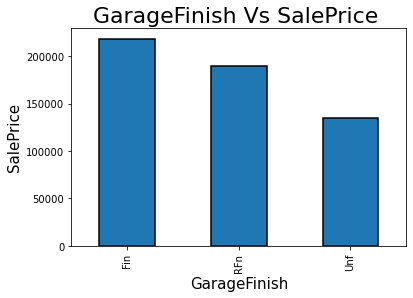

<Figure size 2160x864 with 0 Axes>

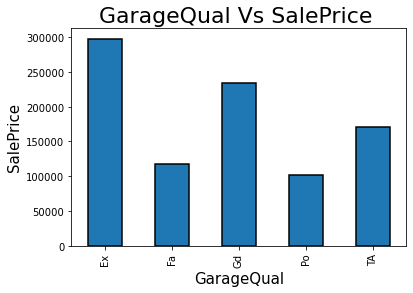

<Figure size 2160x864 with 0 Axes>

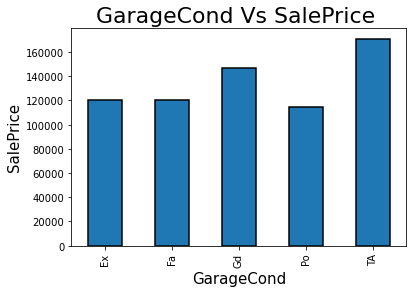

<Figure size 2160x864 with 0 Axes>

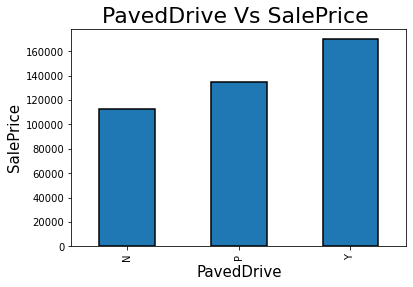

<Figure size 2160x864 with 0 Axes>

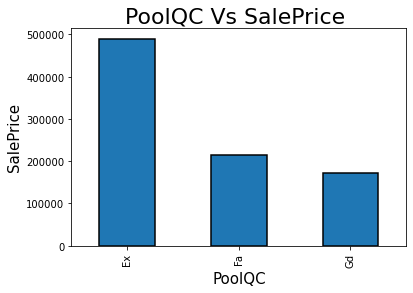

<Figure size 2160x864 with 0 Axes>

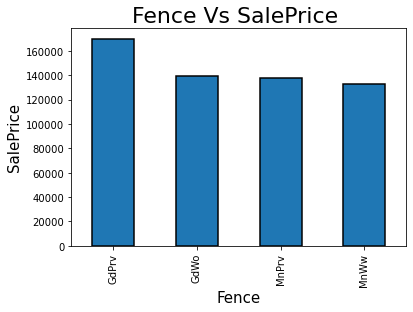

<Figure size 2160x864 with 0 Axes>

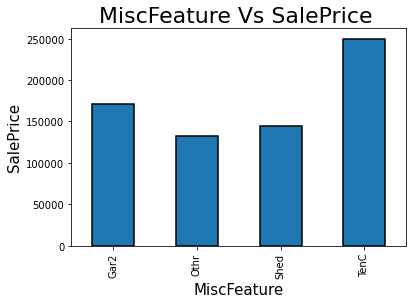

<Figure size 2160x864 with 0 Axes>

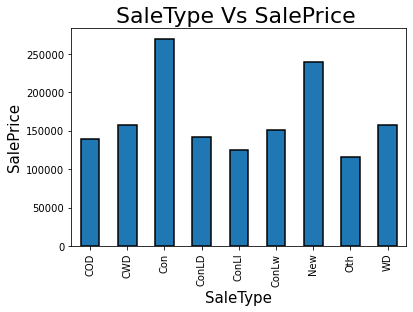

<Figure size 2160x864 with 0 Axes>

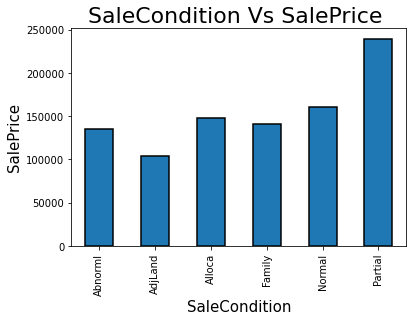

<Figure size 2160x864 with 0 Axes>

In [30]:
for feature in categorical_features:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(edgecolor = "black",linewidth = 1.5)
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel('SalePrice',fontsize = 15)
    plt.title(feature + " Vs SalePrice ",fontsize = 22)
    plt.figure(figsize=(30,12))
    plt.show()

In [31]:
def missing_data(df_train):
    total = df_train.isnull().sum().sort_values(ascending = False)
    Percentage = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
    Dtypes =df_train.dtypes
    return pd.concat([total, Percentage,Dtypes], axis=1, keys=['Total', 'Percentage','Dtypes'])
missing_data(train).style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

In [32]:
#Droping the variable which who has more than 60% of missing values....
train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [33]:
# Dealing with Numerical missing values
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].median())
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].median())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

In [34]:
#Dealing with ctegorical Missing values
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])


In [35]:
def missing_data(df_train):
    total = df_train.isnull().sum().sort_values(ascending = False)
    Percentage = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
    Dtypes =df_train.dtypes
    return pd.concat([total, Percentage,Dtypes], axis=1, keys=['Total', 'Percentage','Dtypes'])
missing_data(train).style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

In [36]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [37]:
test.shape

(292, 80)

In [38]:
print("Column names in the Testing Dataset are:\n",test.columns)

Column names in the Testing Dataset are:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Gar

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [40]:
test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   291.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   175.030021   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 38 columns]

<AxesSubplot:>

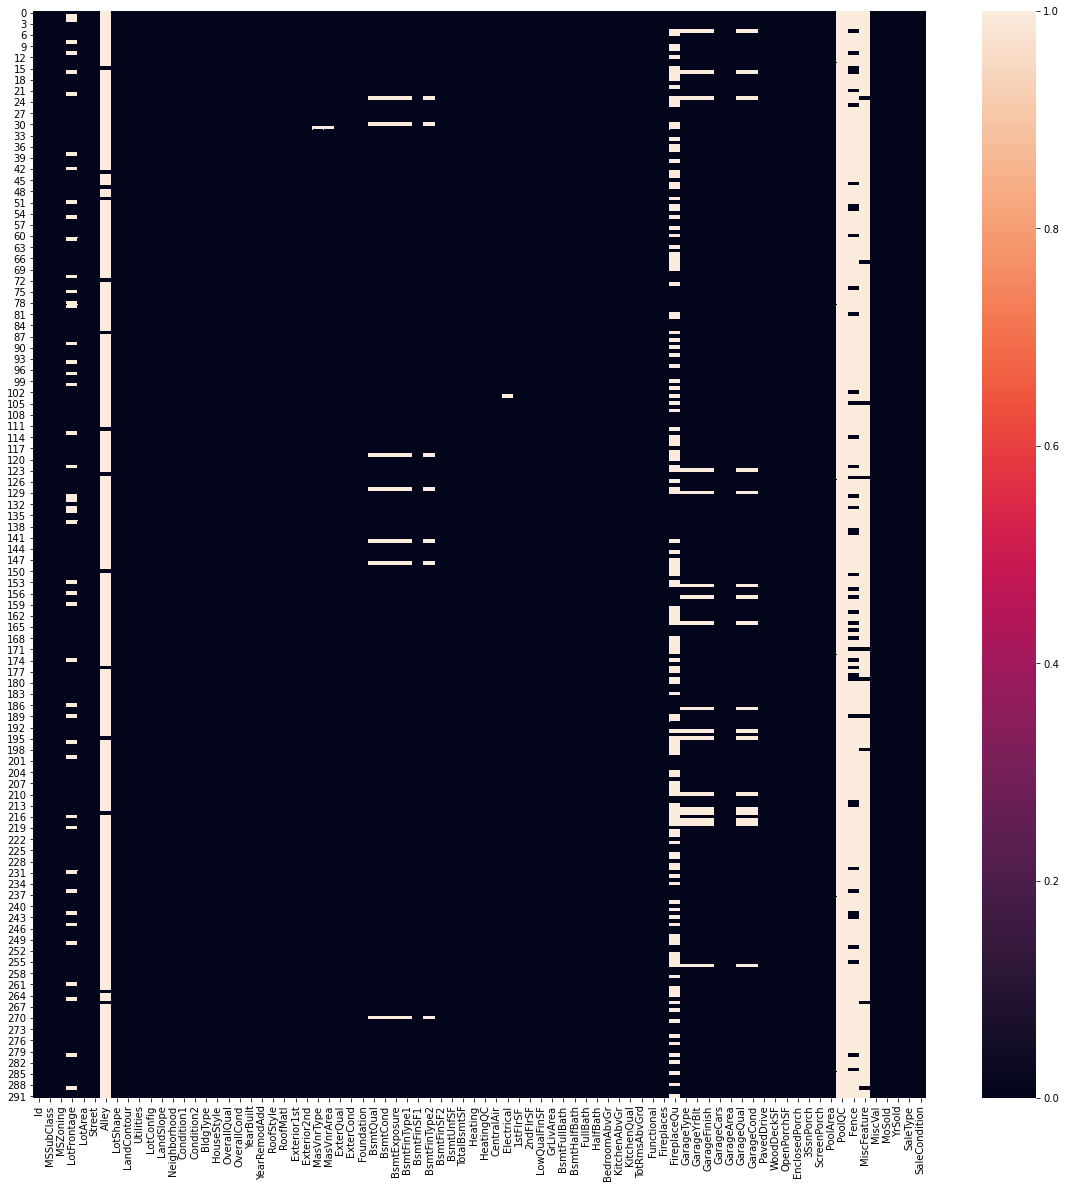

In [41]:
#visvalizing missing values
plt.figure(figsize=(20,20))
sns.heatmap(test.isnull())

In [42]:
## Here we will check the percentage of nan values present in each feature
features_with_na=[features for features in test.columns if test[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(test[feature].isnull().mean(), 4),  ' % missing values.')
    print('\n')

LotFrontage 0.1541  % missing values.


Alley 0.9521  % missing values.


BsmtQual 0.024  % missing values.


BsmtCond 0.024  % missing values.


BsmtExposure 0.024  % missing values.


BsmtFinType1 0.024  % missing values.


BsmtFinType2 0.024  % missing values.


FireplaceQu 0.476  % missing values.


GarageType 0.0582  % missing values.


GarageYrBlt 0.0582  % missing values.


GarageFinish 0.0582  % missing values.


GarageQual 0.0582  % missing values.


GarageCond 0.0582  % missing values.


PoolQC 1.0  % missing values.


Fence 0.8493  % missing values.


MiscFeature 0.9658  % missing values.




In [43]:
# list of numerical variables............
numerical_features = [feature for feature in test.columns if test[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')
# visualise the numerical variables........
test[numerical_features].head()

Number of numerical variables:  38




Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0   337          20         86.0    14157            9            5   
1  1018         120          NaN     5814            8            5   
2   929          20          NaN    11838            8            5   
3  1148          70         75.0    12000            7            7   
4  1227          60         86.0    14598            6            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0       2005          2006       200.0        1249  ...         178   
1       1984          1984         0.0        1036  ...          63   
2       2001          2001         0.0           0  ...         202   
3       1941          1950         0.0         275  ...           0   
4       2007          2007        74.0           0  ...         100   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0           51              0          0            0         0     NaN   
1            0              0          0            0         0     NaN   
2          151              0          0            0         0     NaN   
3            0              0          0            0         0     NaN   
4           18              0          0            0         0     NaN   

   MiscVal  MoSold  YrSold  
0        0       7    2007  
1        0       8    2009  
2        0       6    2009  
3        0       7    2009  
4        0       1    2008  

[5 rows x 38 columns]

In [44]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [45]:
for feature in year_feature:
    print(feature, test[feature].unique())
    print('\n')

YearBuilt [2005 1984 2001 1941 2007 1970 1989 1998 1927 1958 1954 1963 2006 1900
 1985 1999 1987 1920 1977 1967 1930 1968 1922 1978 2003 2004 1957 1924
 2000 1994 1972 1948 1996 1931 1959 1925 1939 1926 1965 1973 1976 1964
 1992 1923 1960 2002 1950 1995 1980 1915 1979 1962 1890 1938 1953 1990
 1974 1945 1988 1955 1952 1932 1940 1956 2009 1971 1947 1975 1946 1997
 1966 2008 1993 1914 1969 1885 1916 1872 1928 1935 1910 1919 1892 1982]


YearRemodAdd [2006 1984 2001 1950 2007 1970 2005 2008 1989 1998 1983 1954 1963 1985
 1958 1999 1987 1988 1977 1967 2000 1968 1978 2003 1957 1994 1972 1996
 1959 2004 1960 1997 1992 1973 1976 1964 2002 1982 1965 1990 1980 1979
 1953 1962 1995 1991 1974 1952 1955 1956 2009 1971 1975 1966 1969 1993
 2010]


GarageYrBlt [2005. 1984. 2001. 1941. 2007.   nan 1989. 1998. 1920. 1970. 1954. 1963.
 2006. 1978. 1964. 1999. 1987. 1930. 1977. 1967. 1925. 1968. 1922. 2003.
 2004. 1957. 1924. 2000. 1994. 1972. 1948. 1959. 1965. 2008. 1979. 1926.
 1996. 1973. 1976. 1992.

In [46]:
discrete_feature=[feature for feature in numerical_features if len(test[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 19


In [47]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MoSold']

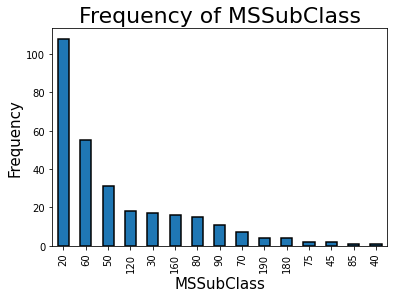

<Figure size 2160x864 with 0 Axes>

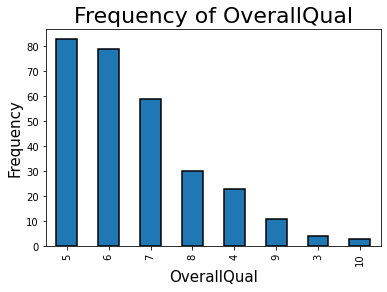

<Figure size 2160x864 with 0 Axes>

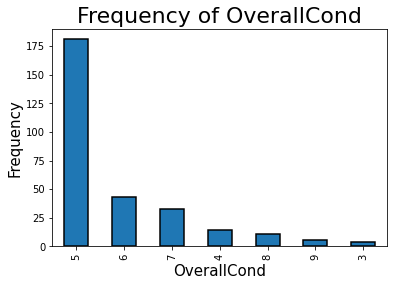

<Figure size 2160x864 with 0 Axes>

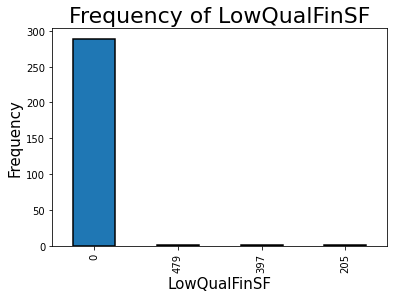

<Figure size 2160x864 with 0 Axes>

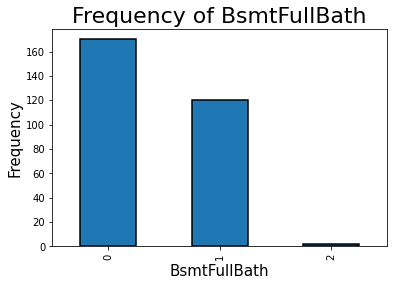

<Figure size 2160x864 with 0 Axes>

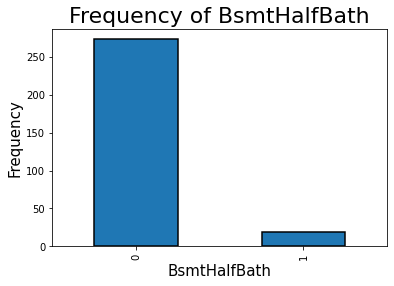

<Figure size 2160x864 with 0 Axes>

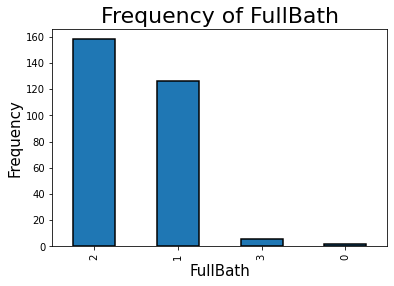

<Figure size 2160x864 with 0 Axes>

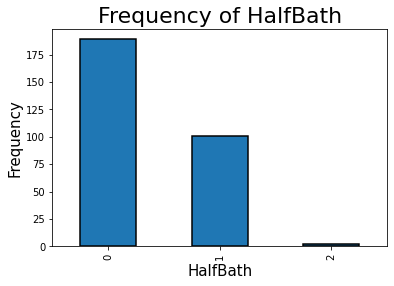

<Figure size 2160x864 with 0 Axes>

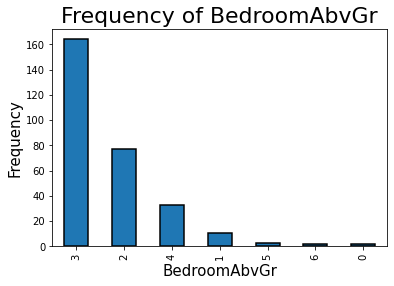

<Figure size 2160x864 with 0 Axes>

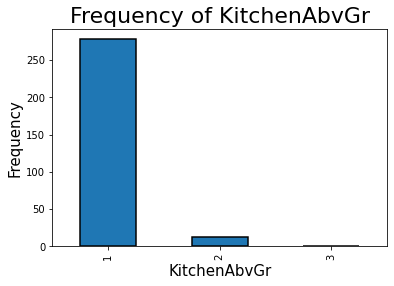

<Figure size 2160x864 with 0 Axes>

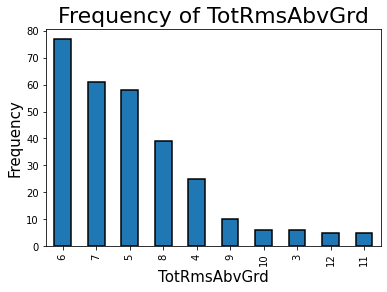

<Figure size 2160x864 with 0 Axes>

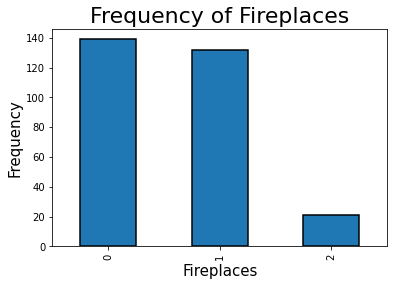

<Figure size 2160x864 with 0 Axes>

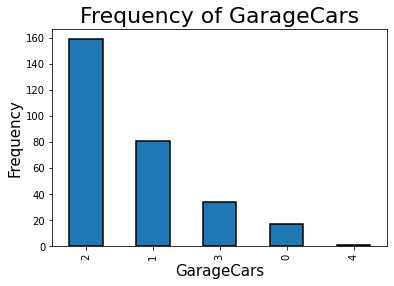

<Figure size 2160x864 with 0 Axes>

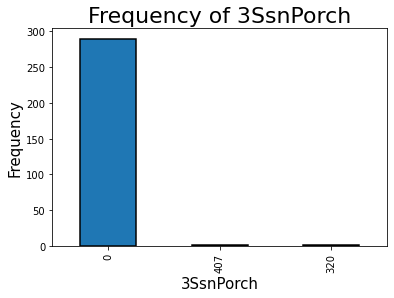

<Figure size 2160x864 with 0 Axes>

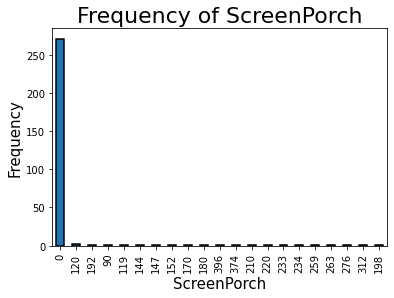

<Figure size 2160x864 with 0 Axes>

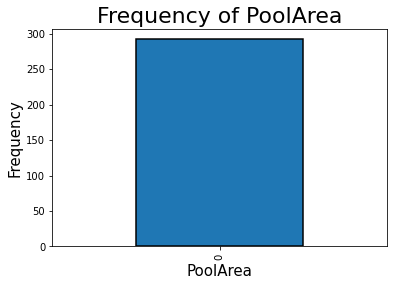

<Figure size 2160x864 with 0 Axes>

IndexError: index 0 is out of bounds for axis 0 with size 0

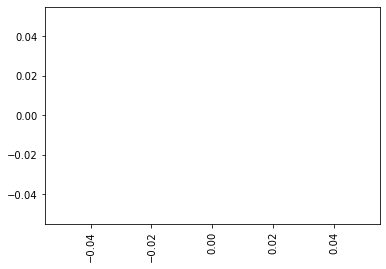

In [48]:
## Frequency of each discrete feature........
for feature in discrete_feature:
    data=test.copy()
    data[feature].value_counts().plot.bar(edgecolor = "black",linewidth=1.5)
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Frequency',fontsize =15)
    plt.title("Frequency of " + feature,fontsize = 22)
    plt.figure(figsize = (30, 12))
    plt.show()
    

In [49]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {} ".format(len(continuous_feature)))

Continuous feature Count 14 


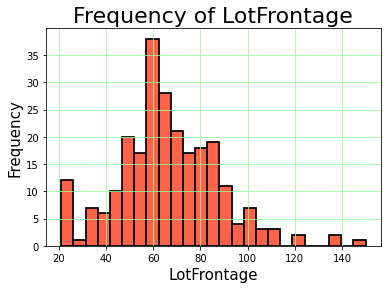

<Figure size 2160x864 with 0 Axes>

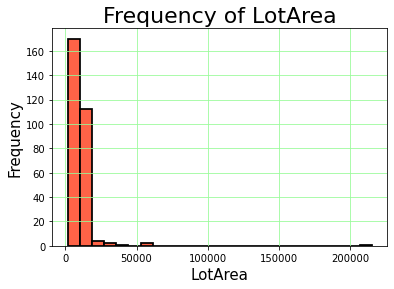

<Figure size 2160x864 with 0 Axes>

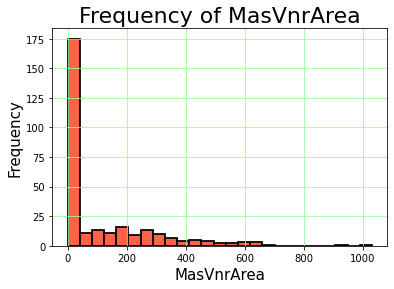

<Figure size 2160x864 with 0 Axes>

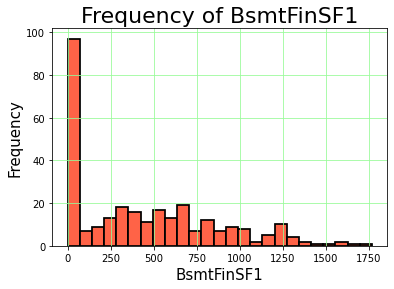

<Figure size 2160x864 with 0 Axes>

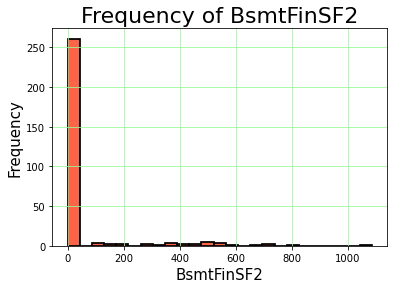

<Figure size 2160x864 with 0 Axes>

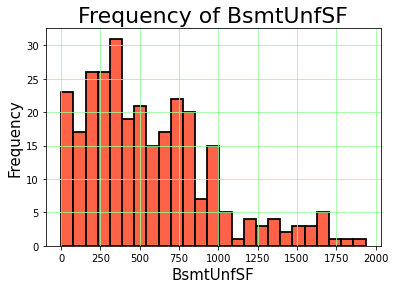

<Figure size 2160x864 with 0 Axes>

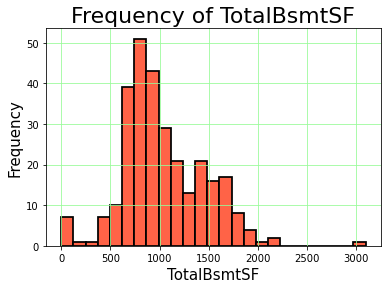

<Figure size 2160x864 with 0 Axes>

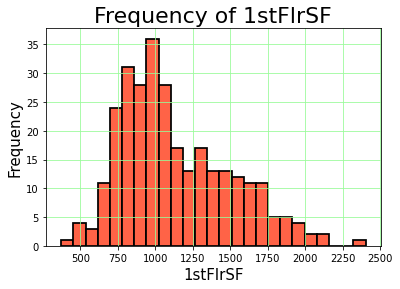

<Figure size 2160x864 with 0 Axes>

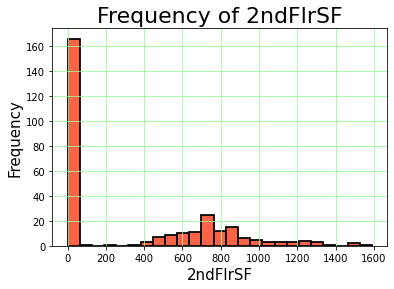

<Figure size 2160x864 with 0 Axes>

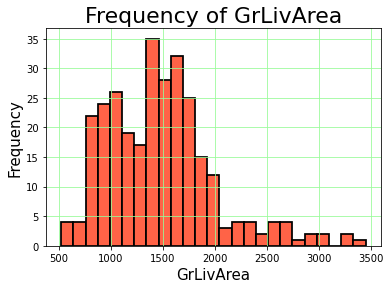

<Figure size 2160x864 with 0 Axes>

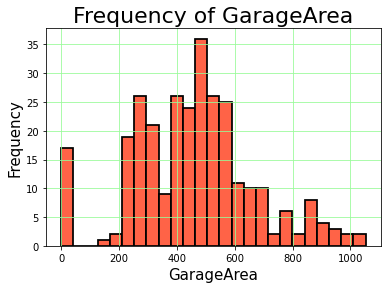

<Figure size 2160x864 with 0 Axes>

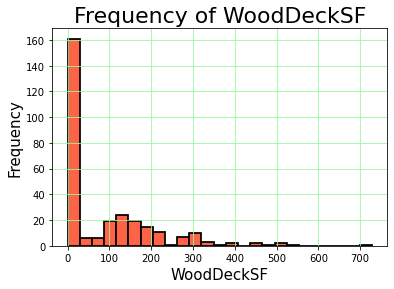

<Figure size 2160x864 with 0 Axes>

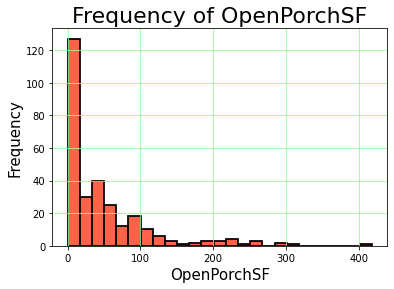

<Figure size 2160x864 with 0 Axes>

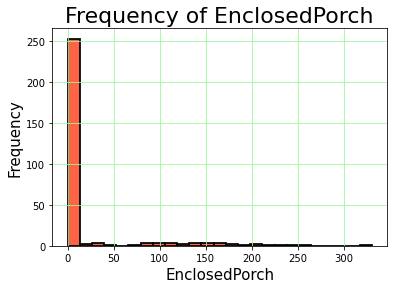

<Figure size 2160x864 with 0 Axes>

In [50]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=test.copy()
    data[feature].hist(bins=25,color = "tomato",edgecolor = "black",linewidth = 1.75)
    plt.xlabel(feature + "",fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    plt.title("Frequency of " + feature,fontsize = 22) 
    plt.grid(color = "palegreen")
    plt.figure(figsize = (30, 12))
    plt.show()

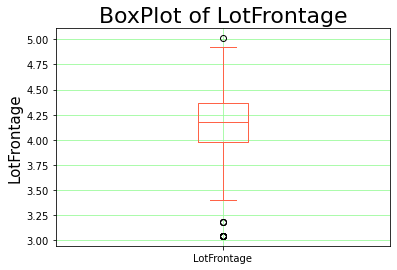

<Figure size 2160x864 with 0 Axes>

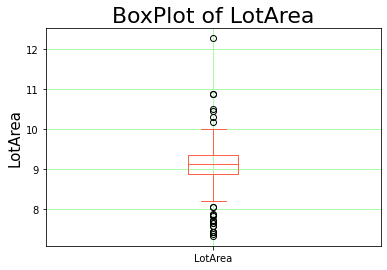

<Figure size 2160x864 with 0 Axes>

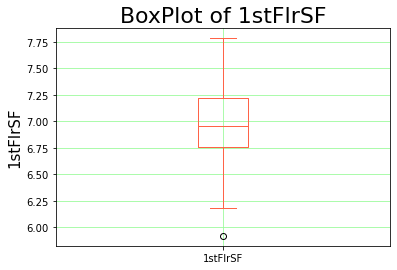

<Figure size 2160x864 with 0 Axes>

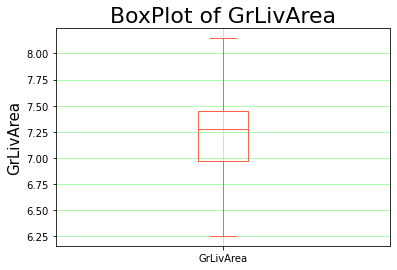

<Figure size 2160x864 with 0 Axes>

In [51]:
#checking outliers
for feature in continuous_feature:
    data=test.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature,color = 'tomato')
        plt.ylabel(feature,fontsize = 15)
        plt.title("BoxPlot of " + feature,fontsize = 22)
        plt.grid(color = "palegreen")
        plt.figure(figsize=(30,12))
        plt.show()

In [52]:
#categorical feature
categorical_features=[feature for feature in test.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [53]:
test[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         HLS    AllPub    Corner       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
2       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   

  Neighborhood Condition1  ... FireplaceQu GarageType GarageFinish GarageQual  \
0      StoneBr       Norm  ...          Gd     Attchd          Fin         TA   
1      StoneBr       Norm  ...          Ex     Attchd          RFn         TA   
2      CollgCr       Norm  ...          TA     Attchd          RFn         TA   
3      Crawfor       Norm  ...          Gd     Attchd          Unf         TA   
4      Somerst      Feedr  ...          Gd    BuiltIn          Fin         TA   

  GarageCond PavedDrive Fence MiscFeature SaleType SaleCondition  
0         TA          Y   NaN         NaN       WD        Normal  
1         TA          Y   NaN         NaN      COD       Abnorml  
2         TA          Y   NaN         NaN       WD        Normal  
3         TA          Y   NaN         NaN       WD        Normal  
4         TA          Y   NaN         NaN       WD        Normal  

[5 rows x 42 columns]

In [54]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}.'.format(feature,len(test[feature].unique())))
    print('\n')

The feature is MSZoning and number of categories are 4.


The feature is Street and number of categories are 2.


The feature is Alley and number of categories are 3.


The feature is LotShape and number of categories are 4.


The feature is LandContour and number of categories are 4.


The feature is Utilities and number of categories are 2.


The feature is LotConfig and number of categories are 5.


The feature is LandSlope and number of categories are 3.


The feature is Neighborhood and number of categories are 24.


The feature is Condition1 and number of categories are 8.


The feature is Condition2 and number of categories are 2.


The feature is BldgType and number of categories are 5.


The feature is HouseStyle and number of categories are 8.


The feature is RoofStyle and number of categories are 5.


The feature is RoofMatl and number of categories are 3.


The feature is Exterior1st and number of categories are 12.


The feature is Exterior2nd and number of categories are

In [55]:
#PERCENTAGE OF THE MISSING VALUES IN THE DATAFRAME..
def missing_data(df_test):
    total = df_test.isnull().sum().sort_values(ascending = False)
    Percentage = (df_test.isnull().sum()/df_test.isnull().count()*100).sort_values(ascending = False)
    Dtypes =df_test.dtypes
    return pd.concat([total, Percentage,Dtypes], axis=1, keys=['Total', 'Percentage','Dtypes'])
missing_data(test).style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

In [56]:
#Droping the variable which who has more than 60% of missing values....
test.drop(['Id','PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [57]:
# Dealing with Numerical missing values
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].median())
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].median())
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].median())
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].median())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].median())
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median())

In [58]:
#Dealing with ctegorical Missing values
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [59]:
missing_data(test)

Total  Percentage  Dtypes
SaleCondition      0         0.0  object
YearRemodAdd       0         0.0   int64
RoofMatl           0         0.0  object
Exterior1st        0         0.0  object
Exterior2nd        0         0.0  object
...              ...         ...     ...
KitchenAbvGr       0         0.0   int64
KitchenQual        0         0.0  object
TotRmsAbvGrd       0         0.0   int64
Functional         0         0.0  object
MSSubClass         0         0.0   int64

[75 rows x 3 columns]

In [60]:
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL         86.0    14157   Pave      IR1         HLS   
1         120       RL         65.0     5814   Pave      IR1         Lvl   
2          20       RL         65.0    11838   Pave      Reg         Lvl   
3          70       RL         75.0    12000   Pave      Reg         Bnk   
4          60       RL         86.0    14598   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Corner       Gtl  ...          51             0         0   
1    AllPub   CulDSac       Gtl  ...           0             0         0   
2    AllPub    Inside       Gtl  ...         151             0         0   
3    AllPub    Inside       Gtl  ...           0             0         0   
4    AllPub   CulDSac       Gtl  ...          18             0         0   

  ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0           0        0        0       7    2007        WD        Normal  
1           0        0        0       8    2009       COD       Abnorml  
2           0        0        0       6    2009        WD        Normal  
3           0        0        0       7    2009        WD        Normal  
4           0        0        0       1    2008        WD        Normal  

[5 rows x 75 columns]

In [61]:
df = pd.concat([train,test], axis=0)

In [62]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0           120       RL         70.0     4928   Pave      IR1         Lvl   
1            20       RL         95.0    15865   Pave      IR1         Lvl   
2            60       RL         92.0     9920   Pave      IR1         Lvl   
3            20       RL        105.0    11751   Pave      IR1         Lvl   
4            20       RL         70.0    16635   Pave      IR1         Lvl   
..          ...      ...          ...      ...    ...      ...         ...   
287          20       RL         78.0    10206   Pave      Reg         Lvl   
288          20       RL         57.0     9245   Pave      IR2         Lvl   
289          20       RL         65.0    11241   Pave      IR1         Lvl   
290          50       RM         50.0     5000   Pave      Reg         Lvl   
291         160       RM         21.0     1953   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0      AllPub    Inside       Gtl  ...             0         0           0   
1      AllPub    Inside       Mod  ...             0         0         224   
2      AllPub   CulDSac       Gtl  ...             0         0           0   
3      AllPub    Inside       Gtl  ...             0         0           0   
4      AllPub       FR2       Gtl  ...             0         0           0   
..        ...       ...       ...  ...           ...       ...         ...   
287    AllPub    Inside       Gtl  ...             0         0           0   
288    AllPub    Inside       Gtl  ...             0         0           0   
289    AllPub   CulDSac       Gtl  ...             0         0           0   
290    AllPub    Corner       Gtl  ...            36         0           0   
291    AllPub    Inside       Gtl  ...             0         0           0   

    PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0          0       0       2    2007        WD         Normal  128000.0  
1          0       0      10    2007        WD         Normal  268000.0  
2          0       0       6    2007        WD         Normal  269790.0  
3          0       0       1    2010       COD         Normal  190000.0  
4          0       0       6    2009        WD         Normal  215000.0  
..       ...     ...     ...     ...       ...            ...       ...  
287        0       0      10    2008        WD         Normal       NaN  
288        0       0       2    2008        WD         Normal       NaN  
289        0     700       3    2010        WD         Normal       NaN  
290        0       0      10    2006        WD         Normal       NaN  
291        0       0       6    2006        WD         Normal       NaN  

[1460 rows x 76 columns]

In [63]:
cat_cols = df.select_dtypes(include=['category','O'])

In [64]:
cat_cols=cat_cols.columns

In [65]:
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [66]:
def dum_cols(cat_cols_df, df):
    df1=df
    for items in cat_cols_df:
        dummies = pd.get_dummies(df1[items], drop_first=True)
        df1 = pd.concat([df1,dummies], axis=1)
        df1 = df1.drop([items], axis=1)
    return df1

In [67]:
df = dum_cols(cat_cols, df)

In [68]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120         70.0     4928            6            5       1976   
1          20         95.0    15865            8            6       1970   
2          60         92.0     9920            7            5       1996   
3          20        105.0    11751            6            6       1977   
4          20         70.0    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  ConLI  ConLw  New  \
0          1976         0.0         120           0  ...      0      0    0   
1          1970         0.0         351         823  ...      0      0    0   
2          1997         0.0         862           0  ...      0      0    0   
3          1977       480.0         705           0  ...      0      0    0   
4          2000       126.0        1246           0  ...      0      0    0   

   Oth  WD  AdjLand  Alloca  Family  Normal  Partial  
0    0   1        0       0       0       1        0  
1    0   1        0       0       0       1        0  
2    0   1        0       0       0       1        0  
3    0   0        0       0       0       1        0  
4    0   1        0       0       0       1        0  

[5 rows x 237 columns]

In [69]:
df = df.loc[:,~df.columns.duplicated()]

In [70]:
df_train=df.iloc[:1168,:]
df_test=df.iloc[1168:,:]

In [71]:
X_test = df_test.drop(['SalePrice'],axis=1)

In [74]:
X_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

In [75]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_teat=pca.fit_transform(X_test)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [77]:
from sklearn.preprocessing import power_transform
X_train=power_transform(X_train,method='yeo-johnson')
X_test=power_transform(X_test,method='yeo-johnson')

In [78]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [79]:
def fun(f,x,y):
    f.fit(x,y)
    pred=f.predict(x)
    print("MSE=",mean_squared_error(y,pred))
    print("r2 score=",r2_score(y,pred))

In [92]:
from sklearn.model_selection import cross_val_score,KFold
def cvs(m,x,y):
    cv1=KFold(n_splits=5,shuffle=True)
    score=cross_val_score(m,x,y,cv=cv1,scoring='r2')
    print("Cross val score",score)
    print(score.mean())

In [93]:
from sklearn.model_selection import GridSearchCV
def hypertuning(params,model,x,y):
    gd=GridSearchCV(model,params,cv=5)
    gd.fit(x,y)
    print(gd.best_params_)

In [94]:
lr=LinearRegression()
lr_params={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[None,1,2,3]}
hypertuning(lr_params,lr,X_train,y_train)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [98]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)
fun(lr,X_train,y_train)
cvs(lr,X_train,y_train)

MSE= 769204450.7138395
r2 score= 0.8769732754407024
Cross val score [-3.03547066  0.62328189  0.07048686 -0.11140972 -2.42216748]
-0.9750558223074499


In [114]:
r2=[87.69]
CVS=[97.51]
model=['Linear regression']

In [102]:
l=Lasso()
params_lasso={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_lasso,l,X_train,y_train)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [112]:
l=Lasso(alpha=1,copy_X=True,fit_intercept=True,normalize=True)
fun(l,X_train,y_train)
cvs(l,X_train,y_train)

MSE= 769448347.9968975
r2 score= 0.8769342664570237
Cross val score [ 0.71586262  0.17895335  0.59627192 -1.22643932  0.79895671]
0.21272105269187308


In [115]:
CVS.append(21.27)
r2.append(87.69)
model.append('Lasso')

In [116]:
R=Ridge()
params_ridge={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_ridge,R,X_train,y_train)

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [117]:
R=Ridge(alpha=0.1,copy_X=True,fit_intercept=True,normalize=True)
fun(R,X_train,y_train)
cvs(R,X_train,y_train)

MSE= 811885485.9832547
r2 score= 0.8701468615202902
Cross val score [0.75077631 0.66336064 0.63012014 0.71778632 0.78661714]
0.7097321111220924


In [118]:
CVS.append(70.97)
r2.append(87.14)
model.append('Ridge')

In [119]:
en=ElasticNet()
params_en={
    'alpha':[0.001,0.01,0.1,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False]
}
hypertuning(params_en,en,X_train,y_train)

{'alpha': 1, 'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [121]:
en=ElasticNet(alpha=1,copy_X=True,fit_intercept=True,normalize=False)
fun(en,X_train,y_train)
cvs(en,X_train,y_train)

MSE= 1301558011.0290415
r2 score= 0.791828533009376
Cross val score [0.62588862 0.68532985 0.7157686  0.7361411  0.66804389]
0.6862344113004321


In [122]:
CVS.append(68.62)
r2.append(79.18)
model.append('Elastic Net')

In [123]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
params_dtr={'criterion':['mse','friedman_mse','mae'],'splitter':['random','best'],'max_depth':[10,12,15],'min_samples_split':[5,10,15]}
hypertuning(params_dtr,dtr,X_train,y_train)

{'criterion': 'mse', 'max_depth': 15, 'min_samples_split': 10, 'splitter': 'best'}


In [132]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=15,min_samples_split=10,splitter='best')
fun(dtr,X_train,y_train)
cvs(dtr,X_train,y_train)

MSE= 160182120.15677547
r2 score= 0.9743804374018329
Cross val score [0.57046401 0.29454406 0.57740258 0.62667137 0.70910005]
0.5556364151214784


In [133]:
r2.append(97.44)
CVS.append(55.56)
model.append('Decision Tree')

In [134]:
from sklearn.svm import SVR
params_svr={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svr,SVR(),X_train,y_train)

{'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'shrinking': True}


In [137]:
svr=SVR(degree=1,gamma='auto',kernel='linear',shrinking=True)
fun(svr,X_train,y_train)
cvs(svr,X_train,y_train)

MSE= 6392422867.044391
r2 score= -0.02240548218434313
Cross val score [-0.05178754 -0.01308452 -0.10858556  0.02339411 -0.04955103]
-0.03992290914597396


In [138]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
params_knn={'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knn,knn,X_train,y_train)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'weights': 'distance'}


In [141]:
knn=KNeighborsRegressor(algorithm='auto',leaf_size=30,n_neighbors=5,weights='distance')
fun(knn,X_train,y_train)
cvs(knn,X_train,y_train)

MSE= 0.0
r2 score= 1.0
Cross val score [0.47453921 0.60618495 0.48384688 0.54266659 0.59920916]
0.5412893576679932


In [142]:
r2.append(100)
CVS.append(54.13)
model.append("KNN")

In [143]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
rf=RandomForestRegressor()
etr=ExtraTreeRegressor()
ada=AdaBoostRegressor()
Gd=GradientBoostingRegressor()
HGd=HistGradientBoostingRegressor()

In [148]:
#rf hypertuning taking forever
rf=RandomForestRegressor()
fun(rf,X_train,y_train)
cvs(rf,X_train,y_train)

MSE= 244531448.86877033
r2 score= 0.960889587705654
Cross val score [0.77247606 0.78382482 0.74033377 0.63142154 0.70501582]
0.7266144039898915


In [149]:
CVS.append(99.99)
r2.append(72.66)
model.append('Random Forest')

In [150]:
params_etr={'criterion':['mse','friedman_mse','mae'],
            'splitter':['random','best'],
            'max_depth':[10,20,30],
            'min_samples_split':[20,30,40]}
hypertuning(params_etr,etr,X_train,y_train)

{'criterion': 'mae', 'max_depth': 10, 'min_samples_split': 40, 'splitter': 'best'}


In [153]:
etr=ExtraTreeRegressor(criterion='mae',max_depth=10,min_samples_split=40,splitter='best')
fun(etr,X_train,y_train)
cvs(etr,X_train,y_train)

MSE= 1077279931.1742294
r2 score= 0.8276996171267129
Cross val score [0.51987274 0.5448181  0.43429182 0.54267197 0.59556216]
0.5274433567578447


In [154]:
CVS.append(52.74)
r2.append(82.79)
model.append('Extra tree Regressor')

In [158]:
#same with ada boost
cvs(ada,X_train,y_train)
fun(ada,X_train,y_train)

Cross val score [0.73694412 0.64794468 0.71797385 0.76234044 0.54193093]
0.6814268033847692
MSE= 1049239094.8494292
r2 score= 0.8321844744929724


In [159]:
CVS.append(68.14)
r2.append(82.21)
model.append('Ada Boost')

In [162]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
fun(xgb,X_train,y_train)
cvs(xgb,X_train,y_train)

MSE= 2337.986853965341
r2 score= 0.999999626061882
Cross val score [0.7861664  0.7284205  0.68314359 0.80271548 0.81742481]
0.7635741558803364


In [163]:
r2.append(99.99)
CVS.append(76.36)
model.append('XGB Regressor')

In [164]:
res=pd.DataFrame()
res['Models']=model
res['CVS']=CVS
res['r2']=r2
diff=[]
for i in range(0,len(r2)):
    diff.append(r2[i]-CVS[i])
res['diff']=diff
res

Models    CVS      r2   diff
0     Linear regression  97.51   87.69  -9.82
1                 Lasso  21.27   87.69  66.42
2                 Ridge  70.97   87.14  16.17
3           Elastic Net  68.62   79.18  10.56
4         Decision Tree  55.56   97.44  41.88
5                   KNN  54.13  100.00  45.87
6         Random Forest  99.99   72.66 -27.33
7  Extra tree Regressor  52.74   82.79  30.05
8             Ada Boost  68.14   82.21  14.07
9         XGB Regressor  76.36   99.99  23.63

In [165]:
#Linear Regression model is itself the best model

In [166]:
import pickle
filename='housing_price_prediction.pkl'
pickle.dump(lr,open(filename,'wb'))

In [167]:
predict=lr.predict(X_test)

In [168]:
output=pd.DataFrame()
output['Predicted']=predict
output

Predicted
0    162237.808974
1    269748.958407
2     41437.474141
3    293822.718121
4    182402.527829
..             ...
287   79031.444542
288   79163.593284
289  186733.001984
290  139480.957867
291  161933.094357

[292 rows x 1 columns]

In [169]:
output.to_csv('Housing_Price_prediction.csv')